# PROBLEM STATEMENT

A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.

The following is the story of a challenge faced by DHDL Ltd. (Name Changed), an NBFC in India. In recent times, the company is struggling to mark profits due to an increase in Loan Defaults. The company aims to determine the relative importance of each parameter with regards to their contribution as to whether a loan is going to default or not. Provided is a sample that contains the data of 90,000 + clients who have taken a loan from the company in the past with the information on whether the loan defaulted. 

### Objective
The objective is to understand which parameters play an important role in determining whether a client will default on the loan payment or not.

### Data Description
The data contains the different attributes of customers' loan details. The detailed data dictionary is given below.

- **ID:**    unique ID assigned to each applicant
- **loan_amnt:**	loan amount ($) applied each applicant
- **loan_term:**	Loan duration in years
- **interest_rate:**	Applicable interest rate on Loan in %
- **loan_grade:**	Loan Grade Assigned by the bank
- **loan_subgrade:**	Loan SubGrade Assigned by the bank
- **job_experience:**	Number of years job experience 
- **home_ownership:**	Status of House Ownership
- **annual_income:**	Annual income of the applicant
- **income_verification_status:**	Status of Income verification by the bank
- **loan_purpose:**	Purpose of loan
- **state_code:**	State code of the applicant's residence 
- **debt_to_income:**	Ratio to total debt to income (total debt might include other loan aswell)
- **delinq_2yrs:**	number of 30+ days delinquency in past 2 years
- **public_records:**	number of legal cases against the applicant
- **revolving_balance:**	total credit revolving balance
- **total_acc:**	total number of credit lines available in members credit line
- **interest_receive:**	total interest received by the bank on the loan
- **application_type:**	Whether the applicant has applied the loan by creating individuall or joint account
- **last_week_pay:**	How many months have the applicant paid the loan EMI already
- **total_current_balance:**	total current balance of all the accounts of applicant
- **total_revolving_limit:**	total revolving credit limit
- **default:**	status of loan amount, 1 = Defaulter, 0 = Non Defaulters


# Importing Necessary Libraries

In [1]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# importing SVM
from sklearn import svm

# K nearest neighbor (KNN)
from sklearn.neighbors import KNeighborsClassifier

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To tune different models
from sklearn.model_selection import GridSearchCV

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To perform statistical analysis
import scipy.stats as stats

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier

# To get diferent metric scores
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    precision_recall_curve,
    make_scorer,
)
from sklearn import metrics

# this will help in making the Python code more structured automatically
#%load_ext nb_black

# plt.style.use("seaborn-dark")  # this adds beauty to charts
sns.set(rc={"figure.figsize": (10, 6)})

# Importing and Loading the dataset

In [2]:
from google.colab import files
import io

# try:
#     uploaded
# except NameError:
#     uploaded = files.upload()

#uploaded = files.upload()

# data = pd.read_csv(io.BytesIO(uploaded['Train_set.csv']))
# data.shape

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv("/content/drive/MyDrive/Train_set.csv")
data.shape

(93174, 23)

In [5]:
# making a copy training data
df = data.copy()

### Data Overview

In [6]:
# viewing the first 10 rows of the data
df.head(10)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,debt_consolidation,NC,26.68,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,debt_consolidation,SC,31.67,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,debt_consolidation,TX,19.70,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,debt_consolidation,MO,37.39,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,credit_card,TX,8.92,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0
5,56469197,10000,3 years,12.69,C,C2,<5 Years,OWN,56000.0,Not Verified,debt_consolidation,IL,16.16,0.0,1.0,6643,48.0,590.50,INDIVIDUAL,26.0,24054.0,25167.0,0
6,3409695,15000,3 years,11.14,B,B2,10+ years,RENT,100000.0,Not Verified,debt_consolidation,TX,10.51,0.0,1.0,14088,14.0,1020.57,INDIVIDUAL,35.0,14519.0,15200.0,1
7,26276447,10000,3 years,6.49,A,A2,10+ years,MORTGAGE,109000.0,Not Verified,credit_card,NY,10.84,1.0,0.0,12337,26.0,728.68,INDIVIDUAL,74.0,210751.0,18600.0,0
8,48393405,12000,3 years,10.99,B,B4,<5 Years,RENT,45000.0,Verified,credit_card,CT,8.21,0.0,0.0,10550,12.0,879.15,INDIVIDUAL,39.0,10550.0,22000.0,0
9,15140624,7000,3 years,12.49,B,B4,<5 Years,MORTGAGE,53000.0,Not Verified,debt_consolidation,TX,18.84,0.0,0.0,12108,20.0,1186.80,INDIVIDUAL,96.0,145801.0,16800.0,0


In [7]:
# viewing the last 10 rows of the data
df.tail(10)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
93164,22422347,22000,5 years,17.57,D,D4,10+ years,RENT,120000.0,Source Verified,debt_consolidation,IL,15.09,3.0,0.0,18851,32.0,5236.90,INDIVIDUAL,78.0,36619.0,26600.0,0
93165,5257519,18000,5 years,15.80,C,C3,<5 Years,MORTGAGE,60000.0,Verified,credit_card,MI,26.96,0.0,0.0,15494,22.0,6228.14,INDIVIDUAL,144.0,54592.0,21606.0,0
93166,72107466,13000,3 years,12.59,C,C2,6-10 years,RENT,50000.0,Source Verified,debt_consolidation,CA,38.21,0.0,0.0,19071,19.0,0.00,INDIVIDUAL,NaN,61289.0,29000.0,0
93167,53312784,7800,3 years,12.29,C,C1,NaN,MORTGAGE,21000.0,Verified,debt_consolidation,NY,12.97,0.0,0.0,8197,8.0,479.81,INDIVIDUAL,31.0,93130.0,17200.0,0
93168,5819825,23850,5 years,21.00,E,E2,10+ years,MORTGAGE,90000.0,Verified,home_improvement,NC,19.72,0.0,1.0,9954,10.0,10977.49,INDIVIDUAL,139.0,74395.0,12200.0,0
93169,65577252,3200,3 years,7.26,A,A4,<5 Years,RENT,85000.0,Not Verified,debt_consolidation,FL,17.11,0.0,0.0,7924,38.0,55.34,INDIVIDUAL,13.0,64635.0,47600.0,0
93170,836021,3500,3 years,5.42,A,A1,NaN,MORTGAGE,57550.0,Not Verified,other,FL,22.64,0.0,0.0,10174,24.0,299.67,INDIVIDUAL,161.0,NaN,NaN,1
93171,33058720,8000,3 years,13.98,C,C3,10+ years,RENT,148531.5,Source Verified,credit_card,AK,13.04,1.0,0.0,5391,25.0,1150.58,INDIVIDUAL,65.0,94596.0,6500.0,0
93172,4060472,35000,3 years,17.77,D,D1,<5 Years,RENT,100000.0,Verified,debt_consolidation,CA,17.22,0.0,0.0,24609,45.0,5764.58,INDIVIDUAL,56.0,33759.0,34900.0,1
93173,3628127,10000,3 years,15.80,C,C3,<5 Years,RENT,60000.0,Verified,debt_consolidation,NJ,11.83,0.0,0.0,11285,7.0,2279.36,INDIVIDUAL,104.0,25594.0,12300.0,0


In [8]:
# vieing random 50 randam ros from data
df.sample(n=15, random_state=42)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
51490,1876930,20000,5 years,18.75,D,D3,<5 Years,MORTGAGE,52000.0,Verified,debt_consolidation,TX,20.75,0.0,0.0,3477,17.0,1230.24,INDIVIDUAL,18.0,153333.0,8000.0,0
84356,71985905,29800,5 years,19.99,E,E4,10+ years,MORTGAGE,70000.0,Source Verified,other,CA,8.91,0.0,0.0,6509,44.0,463.33,INDIVIDUAL,4.0,172826.0,47300.0,0
41315,68711502,7500,3 years,9.17,B,B2,<5 Years,OWN,90000.0,Source Verified,debt_consolidation,TX,6.80,0.0,0.0,10742,18.0,107.51,INDIVIDUAL,9.0,14650.0,26600.0,0
13945,25436072,5400,3 years,14.49,C,C4,10+ years,MORTGAGE,48000.0,Source Verified,credit_card,TN,26.52,0.0,0.0,8078,17.0,492.23,INDIVIDUAL,35.0,247468.0,11100.0,1
53760,2426527,8000,3 years,10.16,B,B1,10+ years,MORTGAGE,51000.0,Not Verified,other,TX,12.07,1.0,0.0,11316,45.0,920.37,INDIVIDUAL,74.0,100854.0,33200.0,1
44371,31807444,2400,3 years,16.29,D,D2,10+ years,MORTGAGE,130000.0,Not Verified,other,LA,23.02,1.0,0.0,28090,27.0,409.81,INDIVIDUAL,65.0,193199.0,28300.0,0
39037,1266263,1500,3 years,9.91,B,B1,<5 Years,MORTGAGE,25632.0,Not Verified,other,UT,2.72,0.0,0.0,531,4.0,116.70,INDIVIDUAL,96.0,NaN,NaN,1
81518,3859082,20000,3 years,11.14,B,B2,<5 Years,RENT,76000.0,Not Verified,debt_consolidation,IL,14.37,0.0,0.0,19520,44.0,2186.64,INDIVIDUAL,61.0,46262.0,27000.0,1
3714,13370161,18000,5 years,19.22,D,D4,10+ years,MORTGAGE,43000.0,Verified,credit_card,GA,21.74,0.0,1.0,9829,47.0,5809.03,INDIVIDUAL,100.0,119314.0,34500.0,0
76341,1287447,21000,5 years,17.27,D,D3,6-10 years,OWN,42000.0,Verified,debt_consolidation,NY,15.80,0.0,0.0,15184,10.0,7453.72,INDIVIDUAL,130.0,NaN,NaN,0


In [9]:
# Checking the shape of the data
shape = df.shape
print(f"There are {shape[0]} rows and {shape[1]} columns in our dataset")

There are 93174 rows and 23 columns in our dataset


In [10]:
# chekingg datatypes of feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

- Some of the features are of type object and some are numeric
- All the columns are in the right data type

In [11]:
# Checking the descriptive statistics of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,93174.0,3.505021e+07,2.414926e+07,70735.00,10859832.50,3.710751e+07,5.859895e+07,73519746.00
loan_amnt,93174.0,1.473386e+04,8.428185e+03,500.00,8000.00,1.300000e+04,2.000000e+04,35000.00
interest_rate,93174.0,1.323343e+01,4.368728e+00,5.32,9.99,1.299000e+01,1.620000e+01,28.99
annual_income,93173.0,7.502826e+04,6.945478e+04,1200.00,45000.00,6.400000e+04,9.000000e+04,9500000.00
debt_to_income,93174.0,1.812762e+01,8.563084e+00,0.00,11.93,1.764000e+01,2.389000e+01,672.52
delinq_2yrs,93172.0,3.169944e-01,8.808591e-01,0.00,0.00,0.000000e+00,0.000000e+00,22.00
public_records,93172.0,1.961212e-01,5.811882e-01,0.00,0.00,0.000000e+00,0.000000e+00,49.00
revolving_balance,93174.0,1.685447e+04,2.368907e+04,0.00,6433.00,1.185600e+04,2.074500e+04,2560703.00
total_acc,93172.0,2.524891e+01,1.185506e+01,1.00,17.00,2.400000e+01,3.200000e+01,119.00
interest_receive,93174.0,1.747264e+03,2.088236e+03,0.00,439.88,1.070755e+03,2.219613e+03,23172.31


- The average annual income of the borrowers is \$75,028.26
- The average debt to income ratio is 18
- About 50% of the borrowed less about \$13,000.00 or less


In [12]:
# Checking the descriptive statistics of object columns
df.describe(include="object")

,loan_term,loan_grade,loan_subgrade,job_experience,home_ownership,income_verification_status,loan_purpose,state_code,application_type
count,93174,93174,93174,88472,93174,93174,93174,93174,93174
unique,2,7,35,3,5,3,4,50,2
top,3 years,B,B3,<5 Years,MORTGAGE,Source Verified,debt_consolidation,CA,INDIVIDUAL
freq,65211,26865,5879,40610,46445,34487,55241,13744,93118


- The maximum loan grade is grade B
- The most occuring loan term in the dataset is 3 years
- majority of the customers that applied for loan are California

In [13]:
# Checking for duplicate row
df.duplicated().sum()

0

- There are no duplicate rows in our data

In [14]:
# Checking for missing values
df.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

- There are 8 columns with missing values and will be treated later

In [15]:
# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)
    print("")

3 years    65211
5 years    27963
Name: loan_term, dtype: int64
--------------------------------------------------

B    26865
C    25787
A    15534
D    14715
E     7378
F     2344
G      551
Name: loan_grade, dtype: int64
--------------------------------------------------

B3    5879
B4    5879
C2    5479
C1    5443
C3    5270
C4    5182
B2    5169
B5    5095
B1    4843
A5    4723
C5    4413
D1    3716
A4    3631
D2    3239
D3    2759
D4    2717
A3    2450
A1    2377
A2    2353
D5    2284
E1    1924
E2    1736
E3    1513
E4    1228
E5     977
F1     745
F2     545
F3     465
F4     355
F5     234
G1     174
G2     146
G3     105
G5      66
G4      60
Name: loan_subgrade, dtype: int64
--------------------------------------------------

<5 Years      40610
10+ years     30362
6-10 years    17500
Name: job_experience, dtype: int64
--------------------------------------------------

MORTGAGE    46445
RENT        37449
OWN          9254
OTHER          18
NONE            8
Name: home_owner

- There are no abnormal values in the unique datas

In [16]:
# observing columns with missing data
filt = df["job_experience"].isnull()
df_nan = df[filt][
    [
        "job_experience",
        "last_week_pay",
        "total_current_balance",
        "total_revolving_limit",
    ]
]
df_nan.head()

,job_experience,last_week_pay,total_current_balance,total_revolving_limit
3,NaN,17.0,183208.0,55400.0
12,NaN,57.0,287228.0,81000.0
15,NaN,61.0,NaN,NaN
55,NaN,96.0,19327.0,7000.0
60,NaN,9.0,NaN,NaN


In [17]:
filt = df["total_current_balance"].isnull()
df_nan = df[filt][["total_current_balance", "total_revolving_limit",]]
df_nan.sample(n=20, random_state=42)

,total_current_balance,total_revolving_limit
91433,NaN,NaN
57386,NaN,NaN
19393,NaN,NaN
45033,NaN,NaN
80934,NaN,NaN
47184,NaN,NaN
83610,NaN,NaN
55209,NaN,NaN
71036,NaN,NaN
26222,NaN,NaN


- All the missing values in total_current_balance column are also missing in total_revolving_limit

# Univariate Analysis

In [18]:
# Lets change the target values from 0,1 to non_defaulters and defaulters
df["default"].replace([0, 1], ["non-defaulter", "defaulter"], inplace=True)

In [19]:
df["total_acc"].dtype

dtype('float64')

#### Boxplot and Histogram

In [20]:
# Function to creat a histogram and boxplot together


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

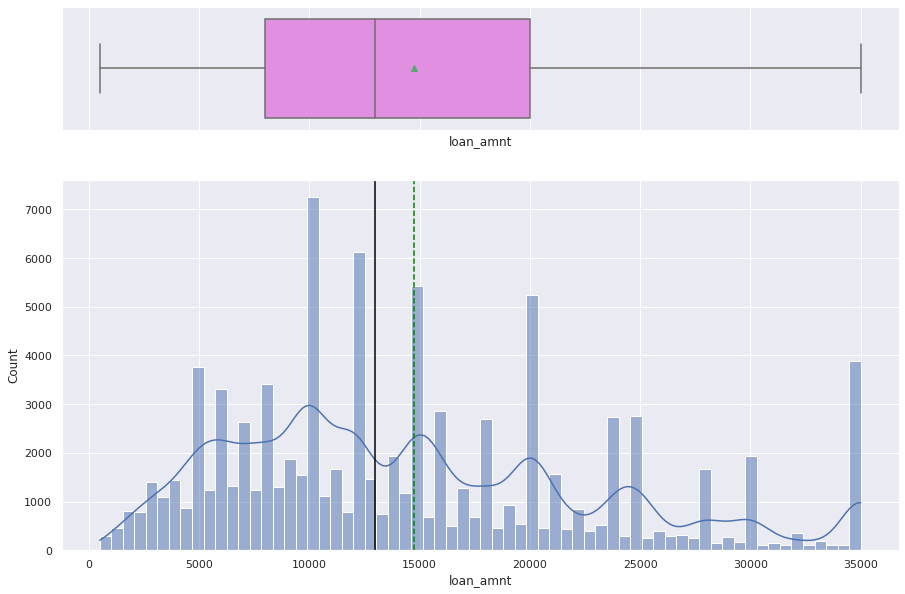

In [21]:
histogram_boxplot(df, "loan_amnt", kde=True)

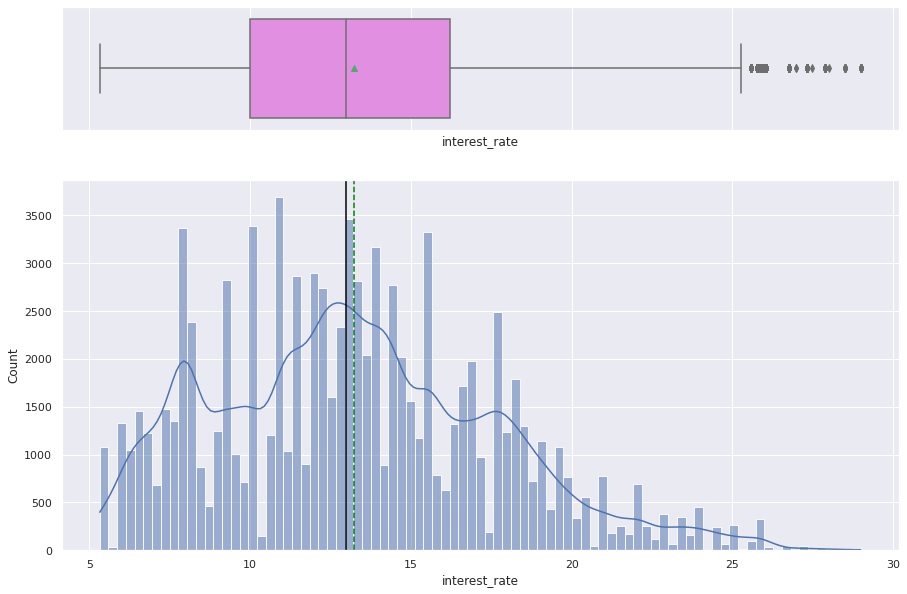

In [22]:
histogram_boxplot(df, "interest_rate", kde=True)

- There are a few outliers in the interest rate plot

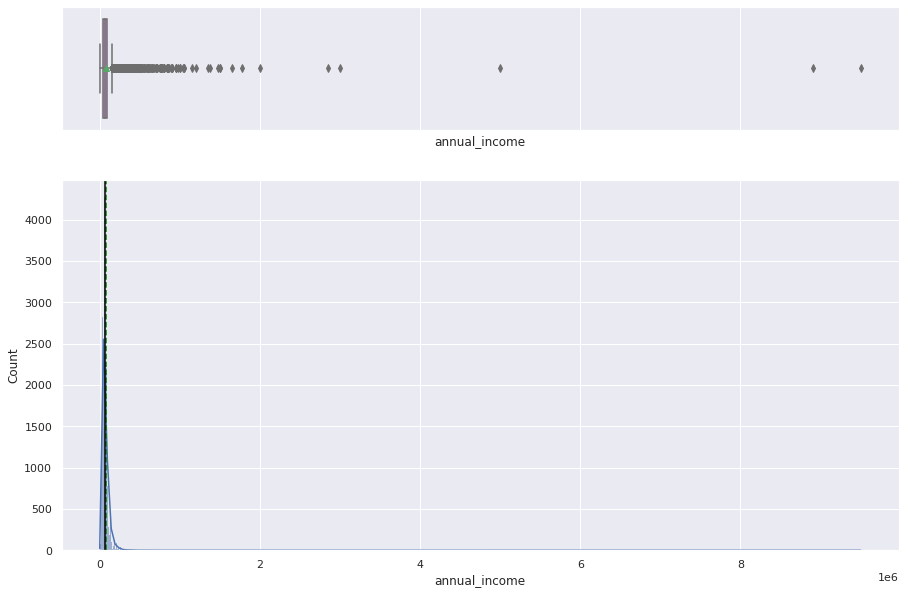

In [23]:
histogram_boxplot(df, "annual_income", kde=True)

- The annual income in the data is highly right skewed

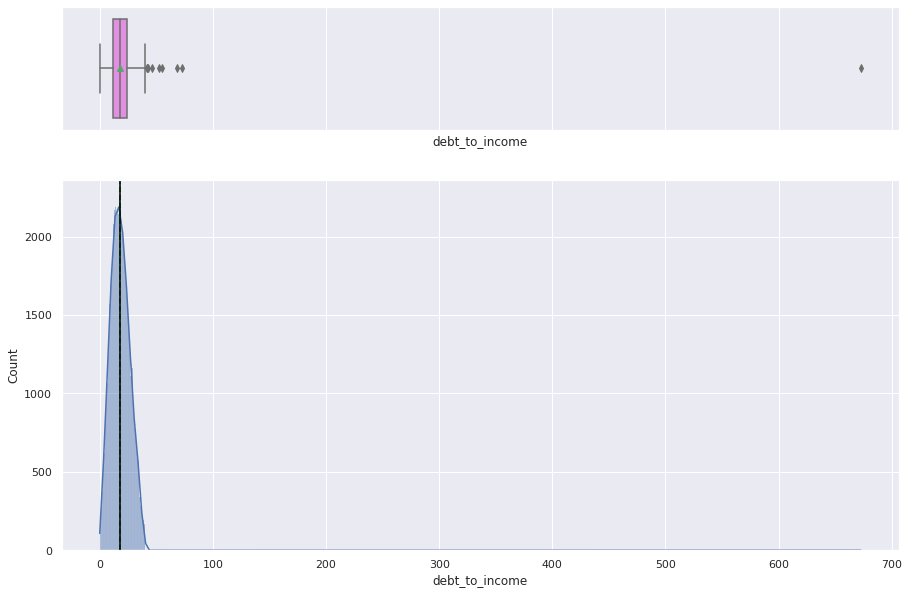

In [24]:
histogram_boxplot(df, "debt_to_income", kde=True)

- The distribution is not normal, and has a few outliers

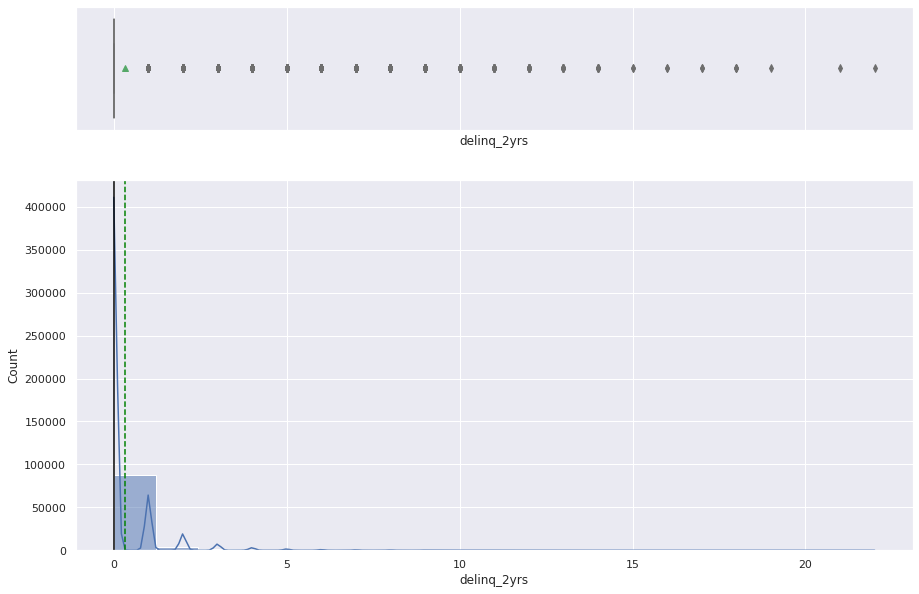

In [25]:
histogram_boxplot(df, "delinq_2yrs", kde=True)

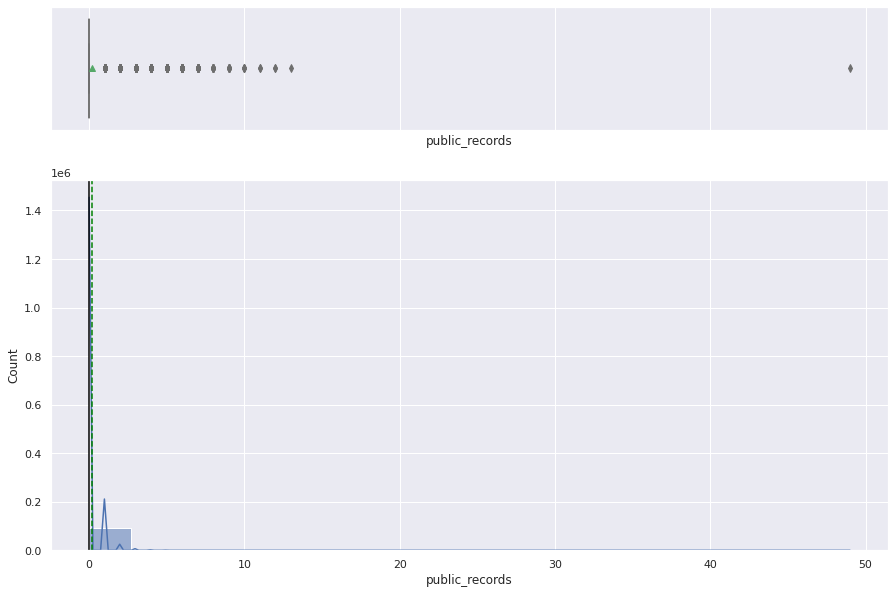

In [26]:
histogram_boxplot(df, "public_records", kde=True)

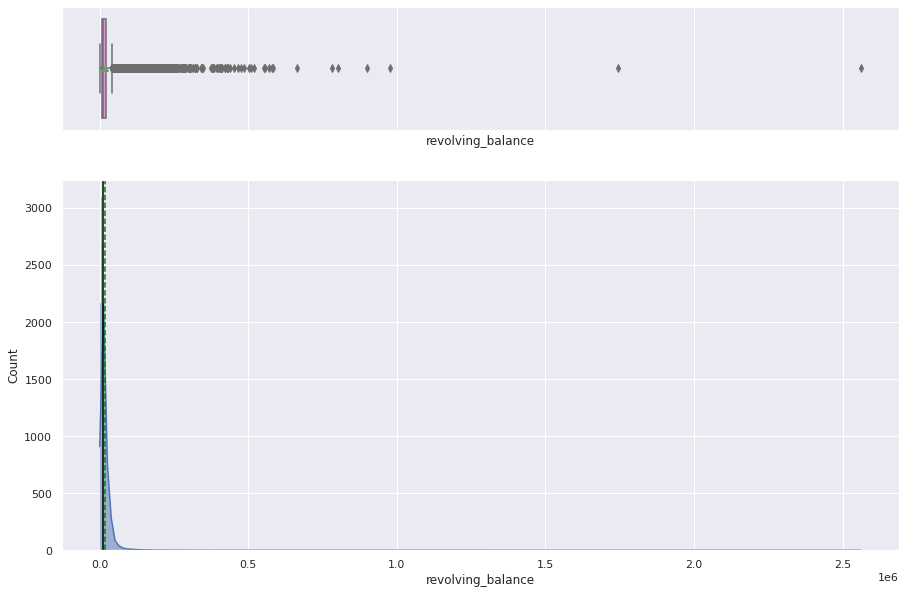

In [27]:
histogram_boxplot(df, "revolving_balance", kde=True)

- The revolving_balance column is right skewed

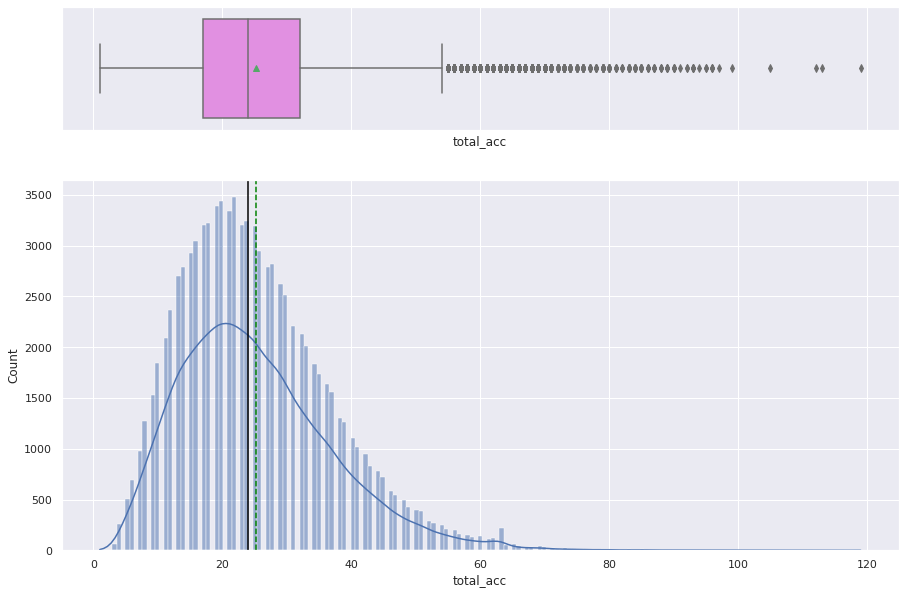

In [28]:
histogram_boxplot(df, "total_acc", kde=True)

- The total_account column is right skewed with outliers

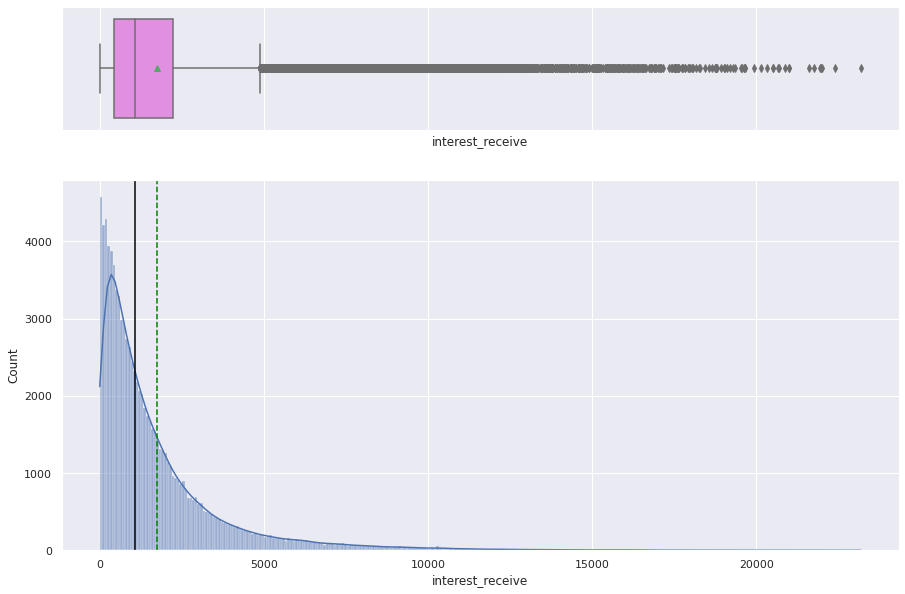

In [29]:
histogram_boxplot(df, "interest_receive", kde=True)

- The interest_received column is right skewed with outliers

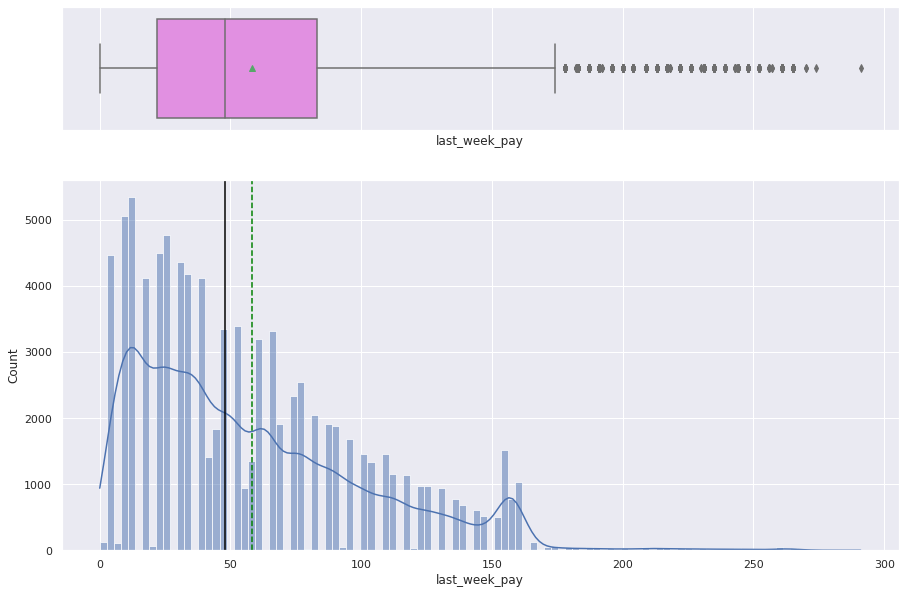

In [30]:
histogram_boxplot(df, "last_week_pay", kde=True)

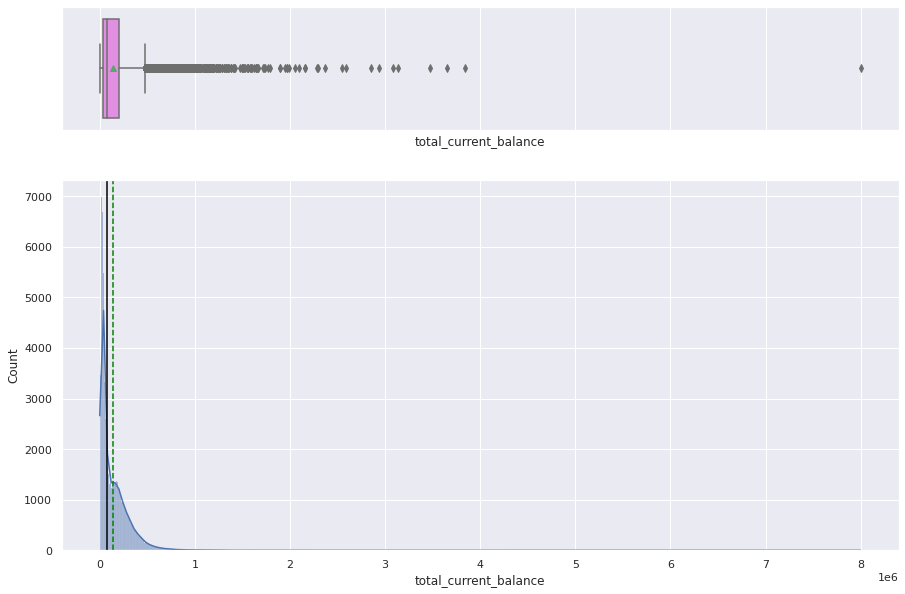

In [31]:
histogram_boxplot(df, "total_current_balance", kde=True)

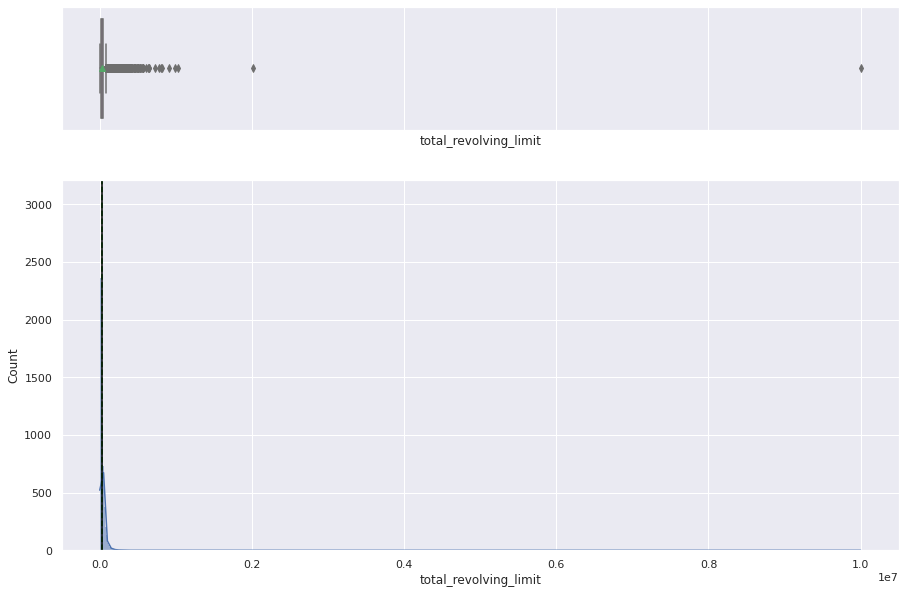

In [32]:
histogram_boxplot(df, "total_revolving_limit", kde=True)

### CountPlot of categorical and discrete variable

In [33]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

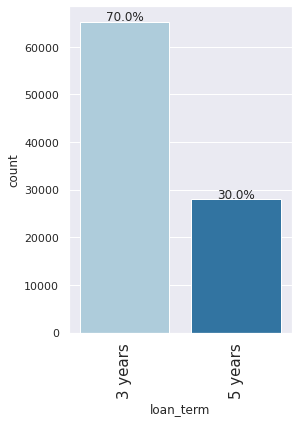

In [34]:
labeled_barplot(df, "loan_term", perc=True)

- 70% of the loans given are on a 3 years loan term


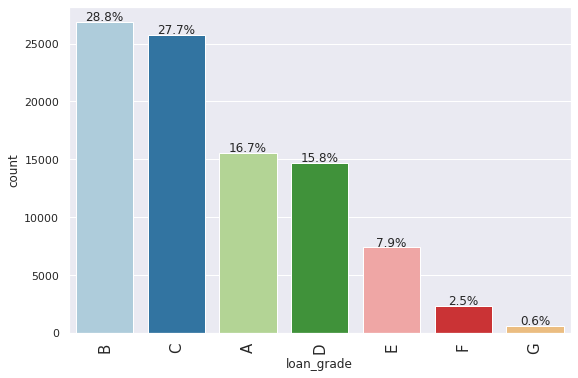

In [35]:
labeled_barplot(df, "loan_grade", perc=True)

- The highest grade of loan taken is grade B. 28.8%
- The least fragde is grade G. (0.6%)

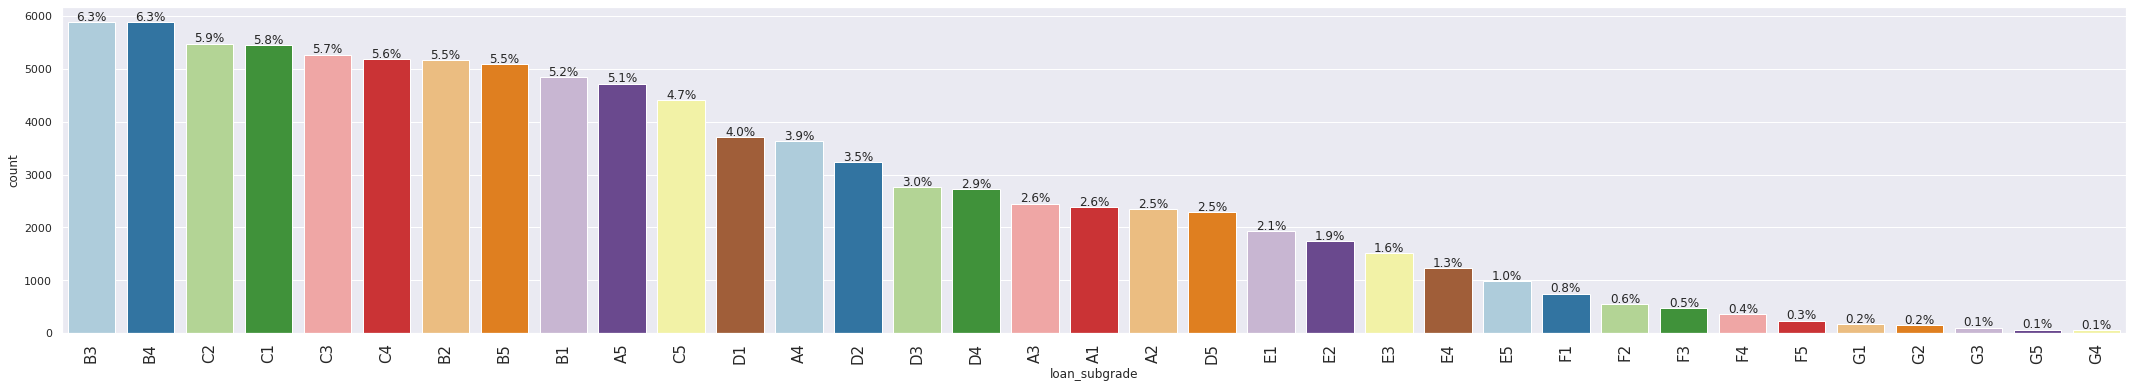

In [36]:
labeled_barplot(df, "loan_subgrade", perc=True)

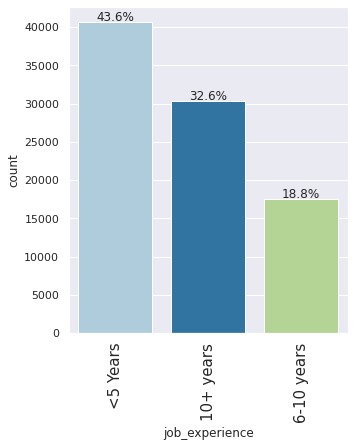

In [37]:
labeled_barplot(df, "job_experience", perc=True)

- 43.6% of the borrowers have less than 5 years job experence

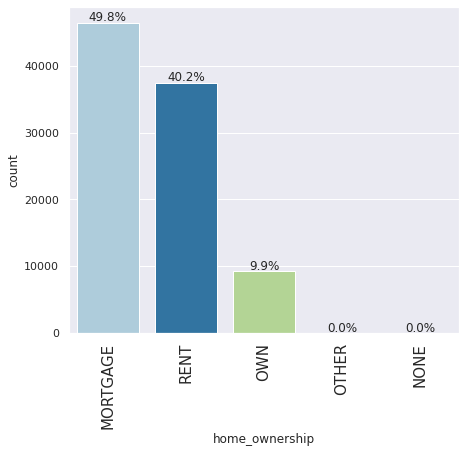

In [38]:
labeled_barplot(df, "home_ownership", perc=True)

- Almost 50% of customers that requested for loans have their homes on mortgage

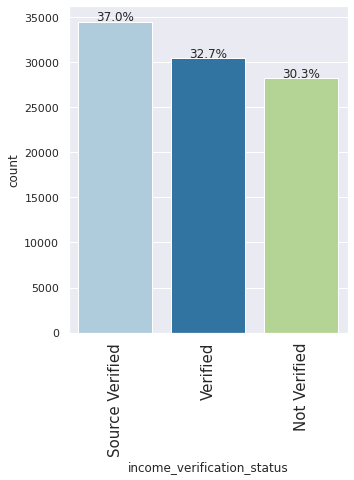

In [39]:
labeled_barplot(df, "income_verification_status", perc=True)

- 30.3% of the borrowers don't have verified income

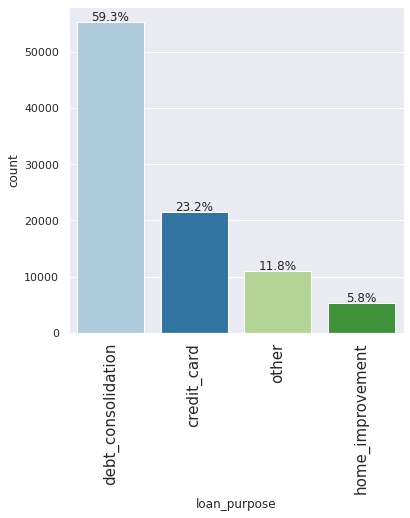

In [40]:
labeled_barplot(df, "loan_purpose", perc=True)

- 59% of the requested loans are for debt consolidation purposes

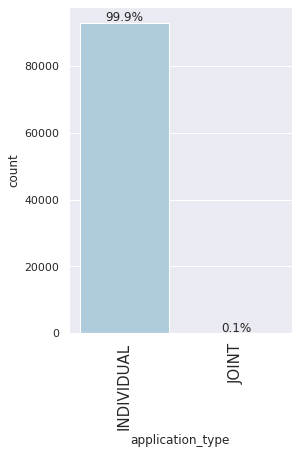

In [41]:
labeled_barplot(df, "application_type", perc=True)

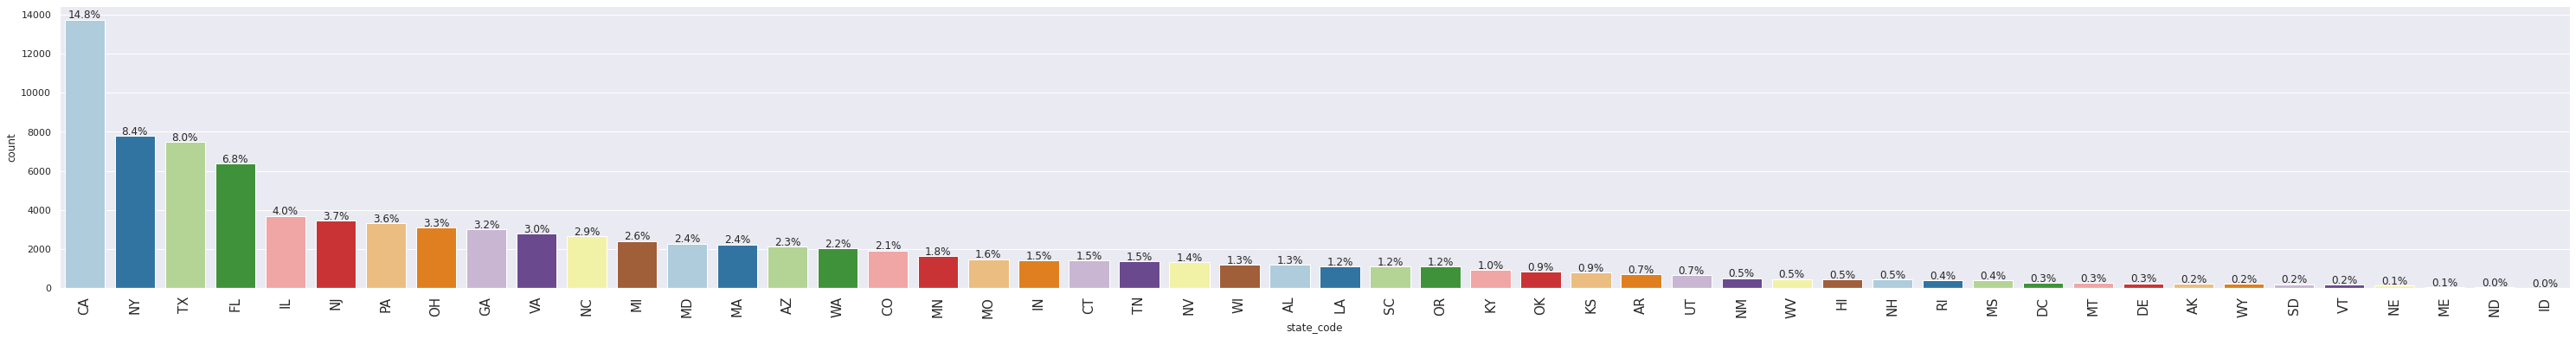

In [42]:
labeled_barplot(df, "state_code", perc=True)

- Almost 100% of the loans were given to individuals

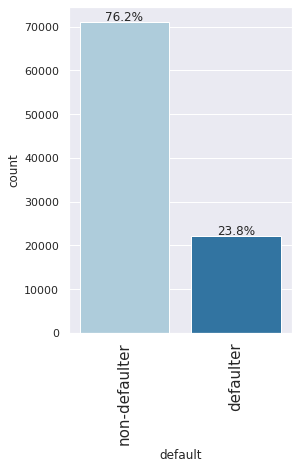

In [43]:
labeled_barplot(df, "default", perc=True)

- 76.2% of the borrowers did not default on their loan
- 23.8% of the borrowers actually defaulted

# Bivariate Analysis

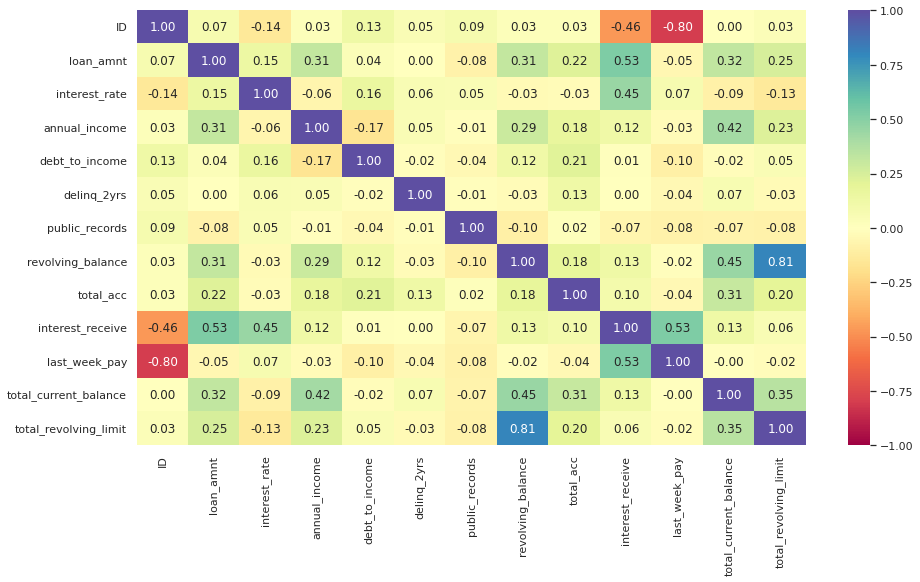

In [44]:
plt.figure(figsize=(15, 8))
cols_list = df.select_dtypes(include=np.number).columns.tolist()

sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- Revolving balance and total revolving limits have a high positive correlation
- The Loan amount and interest received have a podsitive correlation
- Revolving balance and total current balance have a strong positive correlation

In [45]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(15, 12))

    target_uniq = data[target].unique()

    axs[0, 0].set_title(
        f"Distribution of {predictor} \n for target=" + str(target_uniq[0]), fontsize=15
    )
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title(
        f"Distribution of {predictor} \n for target=" + str(target_uniq[1]), fontsize=15
    )
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [46]:
## function for barplot (stacked)
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    tab1.rename(columns={"All": "Total"}, inplace=True)
    tab1[f"% {tab1.columns[0]}"] = (tab1.iloc[:, 0] / tab1.iloc[:, 2]) * 100
    tab1[f"% {tab1.columns[1]}"] = (tab1.iloc[:, 1] / tab1.iloc[:, 2]) * 100
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


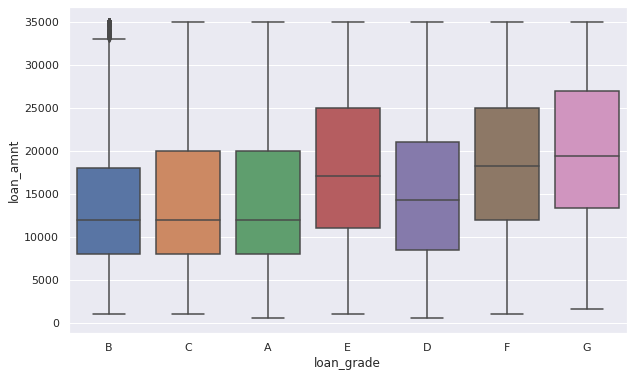

In [47]:
# Lets see the amount of loans taken by each graded
sns.boxplot(data=df, x="loan_grade", y="loan_amnt");

- higher amounts of loans are taken by the grade G

default     defaulter  non-defaulter  Total  % defaulter  % non-defaulter
loan_grade                                                               
All             22129          71045  93174    23.750188        76.249812
B                7078          19787  26865    26.346548        73.653452
C                5584          20203  25787    21.654322        78.345678
A                4253          11281  15534    27.378653        72.621347
D                3237          11478  14715    21.997961        78.002039
E                1375           6003   7378    18.636487        81.363513
F                 482           1862   2344    20.563140        79.436860
G                 120            431    551    21.778584        78.221416
------------------------------------------------------------------------------------------------------------------------


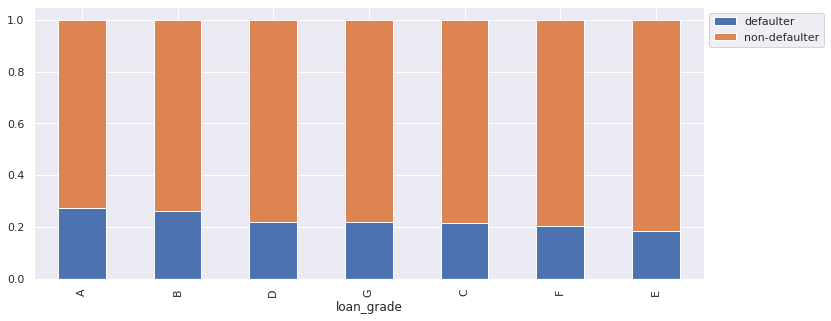

In [48]:
stacked_barplot(df, "loan_grade", "default")

default    defaulter  non-defaulter  Total  % defaulter  % non-defaulter
loan_term                                                               
All            22129          71045  93174    23.750188        76.249812
3 years        17866          47345  65211    27.397218        72.602782
5 years         4263          23700  27963    15.245145        84.754855
------------------------------------------------------------------------------------------------------------------------


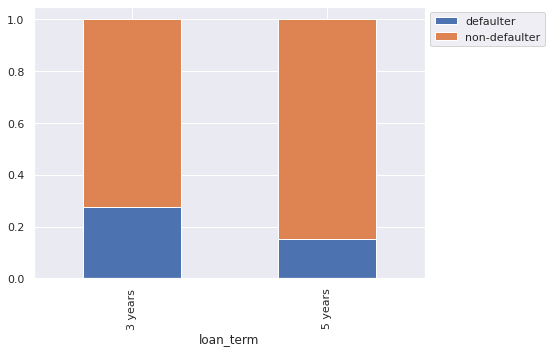

In [49]:
stacked_barplot(df, "loan_term", "default")

- 27.39% of the borowers with the 3 years loan term defaulted
- 15.24% of the borowers with the 5 years loan term defaulted

default         defaulter  non-defaulter  Total  % defaulter  % non-defaulter
job_experience                                                               
All                 21332          67140  88472    24.111583        75.888417
<5 Years            10233          30377  40610    25.198227        74.801773
10+ years            6706          23656  30362    22.086819        77.913181
6-10 years           4393          13107  17500    25.102857        74.897143
------------------------------------------------------------------------------------------------------------------------


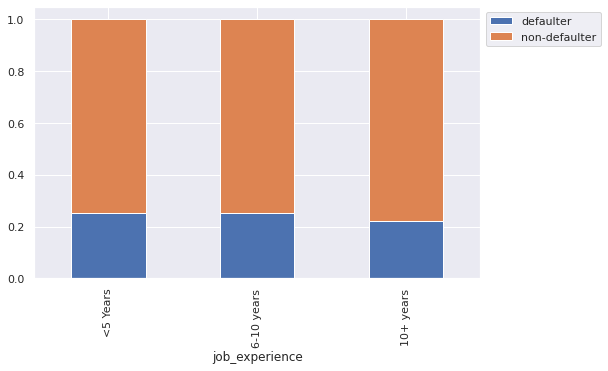

In [50]:
stacked_barplot(df, "job_experience", "default")

- majority of the defaulters have between 0 to 10 years work experience

##### observing the home onwner column to check how the defaulted based on home owwnership status

default         defaulter  non-defaulter  Total  % defaulter  % non-defaulter
home_ownership                                                               
All                 22129          71045  93174    23.750188        76.249812
MORTGAGE            11129          35316  46445    23.961675        76.038325
RENT                 9048          28401  37449    24.160859        75.839141
OWN                  1931           7323   9254    20.866652        79.133348
OTHER                  15              3     18    83.333333        16.666667
NONE                    6              2      8    75.000000        25.000000
------------------------------------------------------------------------------------------------------------------------


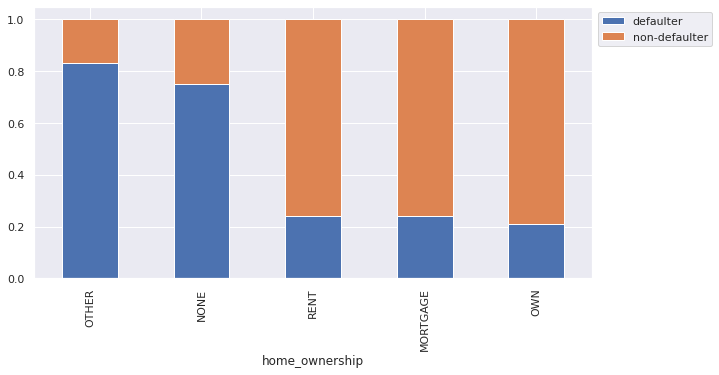

In [51]:
stacked_barplot(df, "home_ownership", "default")

In [52]:
# Finding the mode in the home_ownership columns
high_freq = df["home_ownership"].mode()
high_freq

0    MORTGAGE
dtype: object

In [53]:
# Replacing The "OTHER", "NONE" values with the mode
df["home_ownership"] = df["home_ownership"].replace(["OTHER", "NONE"], "MORTGAGE")

default         defaulter  non-defaulter  Total  % defaulter  % non-defaulter
home_ownership                                                               
All                 22129          71045  93174    23.750188        76.249812
MORTGAGE            11150          35321  46471    23.993458        76.006542
RENT                 9048          28401  37449    24.160859        75.839141
OWN                  1931           7323   9254    20.866652        79.133348
------------------------------------------------------------------------------------------------------------------------


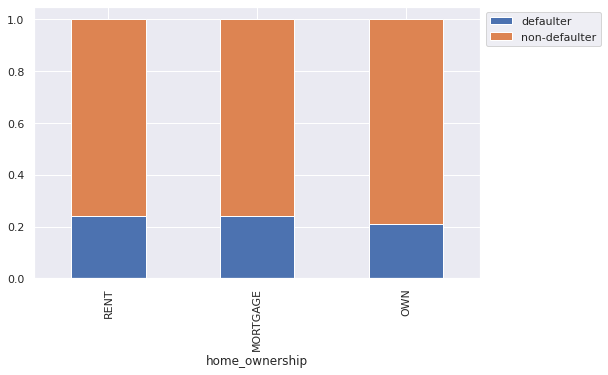

In [54]:
stacked_barplot(df, "home_ownership", "default")

default                     defaulter  non-defaulter  Total  % defaulter  \
income_verification_status                                                 
All                             22129          71045  93174    23.750188   
Not Verified                     7908          20329  28237    28.005808   
Verified                         7796          22654  30450    25.602627   
Source Verified                  6425          28062  34487    18.630208   

default                     % non-defaulter  
income_verification_status                   
All                               76.249812  
Not Verified                      71.994192  
Verified                          74.397373  
Source Verified                   81.369792  
------------------------------------------------------------------------------------------------------------------------


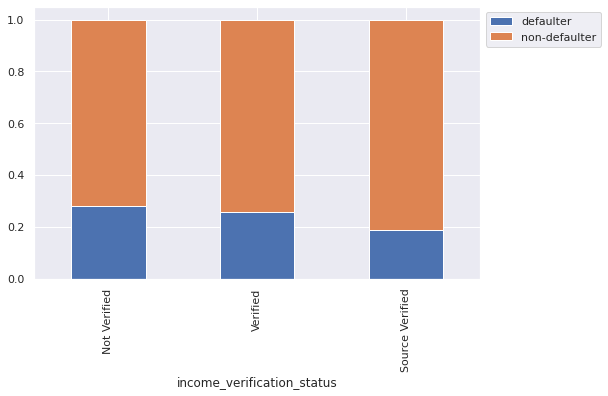

In [55]:
stacked_barplot(df, "income_verification_status", "default")

- about 28% of borrowers with unverified income status defualted

default             defaulter  non-defaulter  Total  % defaulter  \
loan_purpose                                                       
All                     22129          71045  93174    23.750188   
debt_consolidation      12833          42408  55241    23.230934   
credit_card              4565          17006  21571    21.162672   
other                    3408           7563  10971    31.063713   
home_improvement         1323           4068   5391    24.540902   

default             % non-defaulter  
loan_purpose                         
All                       76.249812  
debt_consolidation        76.769066  
credit_card               78.837328  
other                     68.936287  
home_improvement          75.459098  
------------------------------------------------------------------------------------------------------------------------


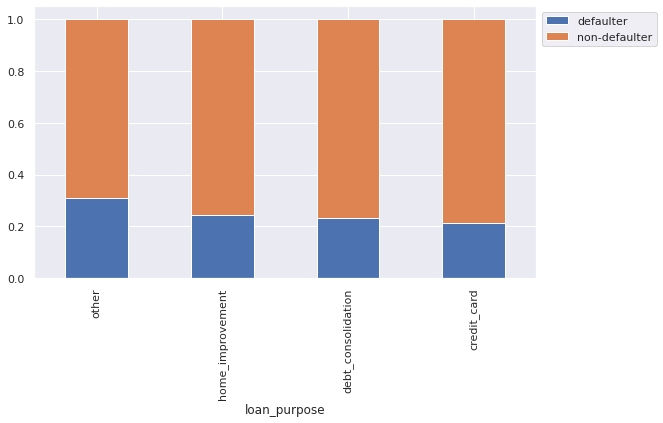

In [56]:
stacked_barplot(df, "loan_purpose", "default")

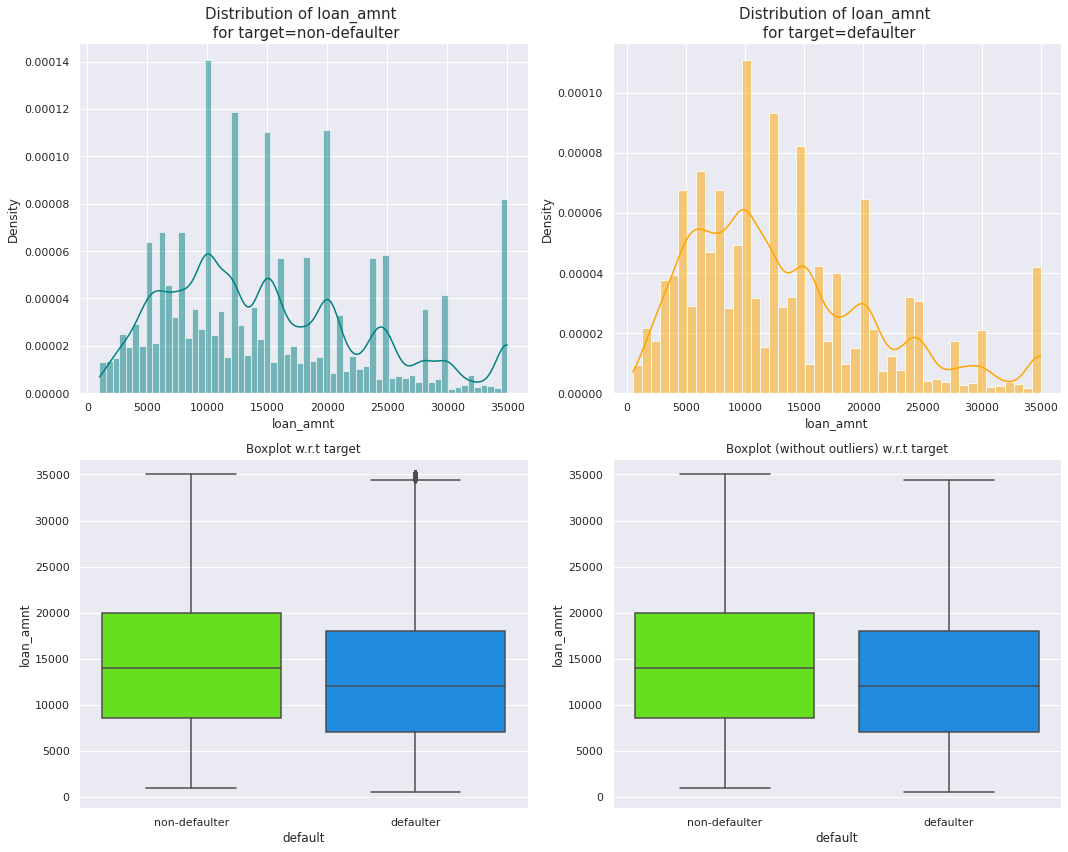

In [57]:
distribution_plot_wrt_target(df, "loan_amnt", "default")

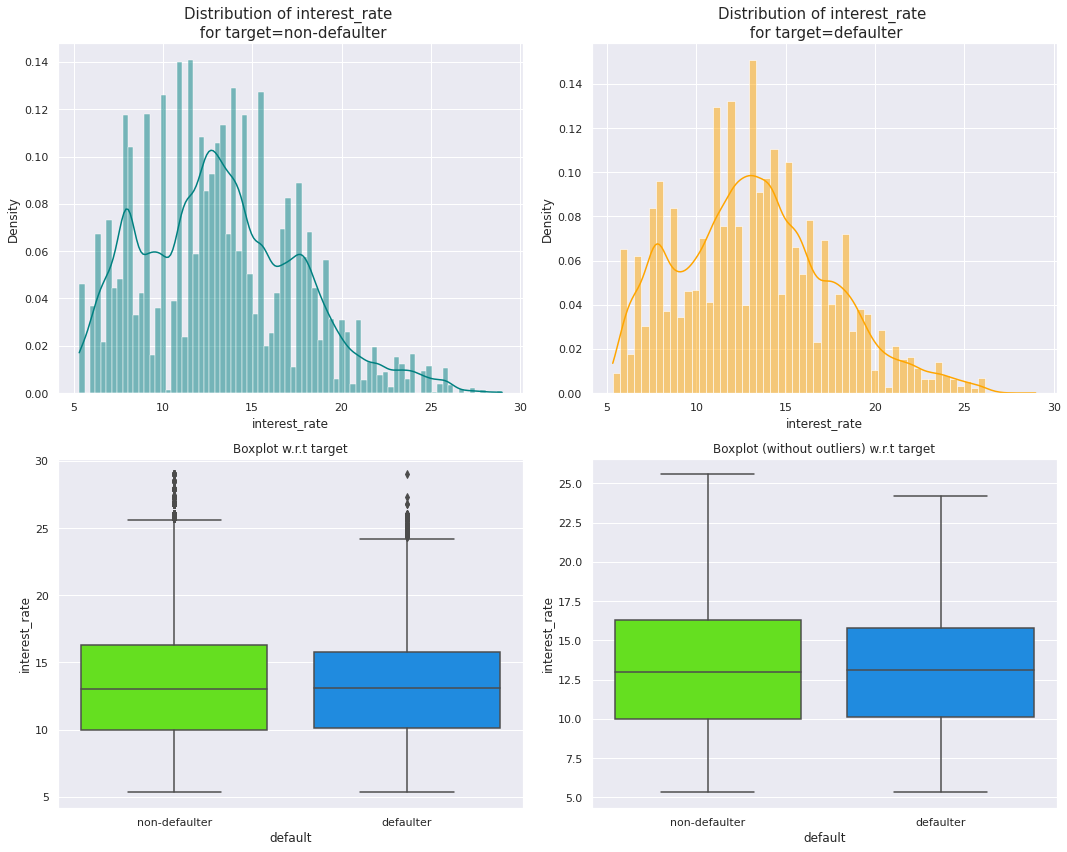

In [58]:
distribution_plot_wrt_target(df, "interest_rate", "default")

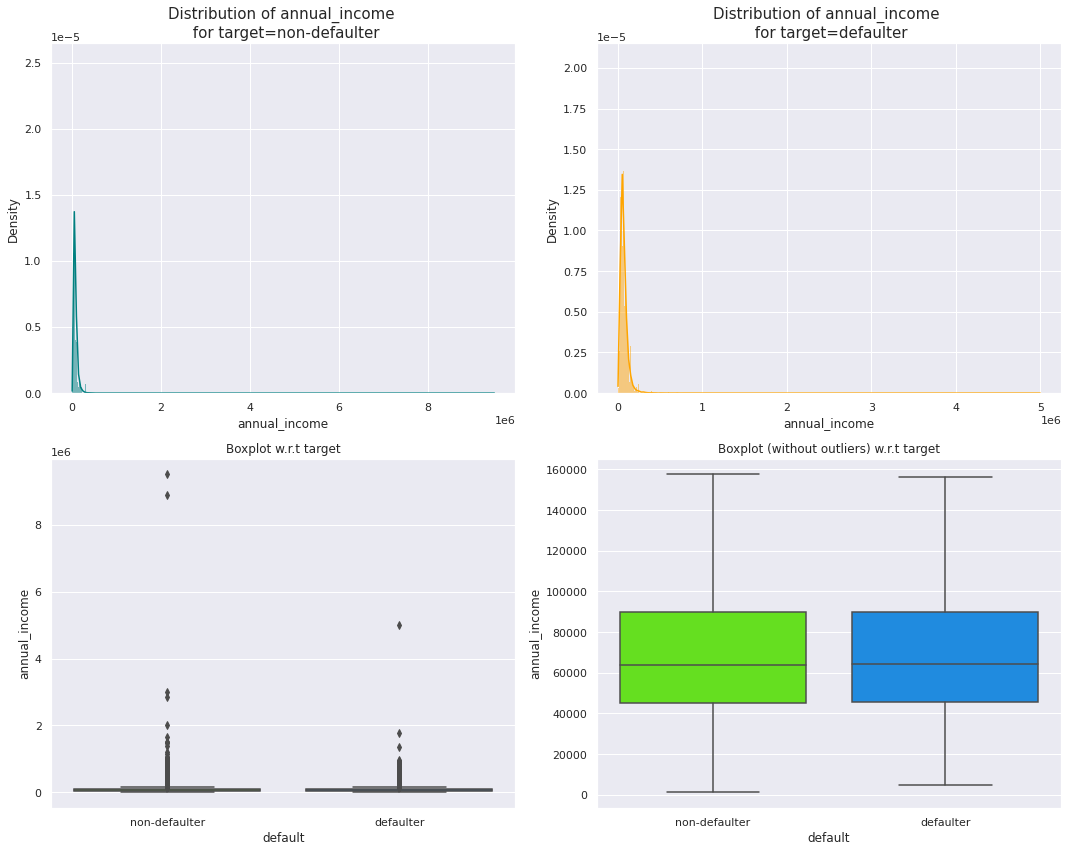

In [59]:
distribution_plot_wrt_target(df, "annual_income", "default")

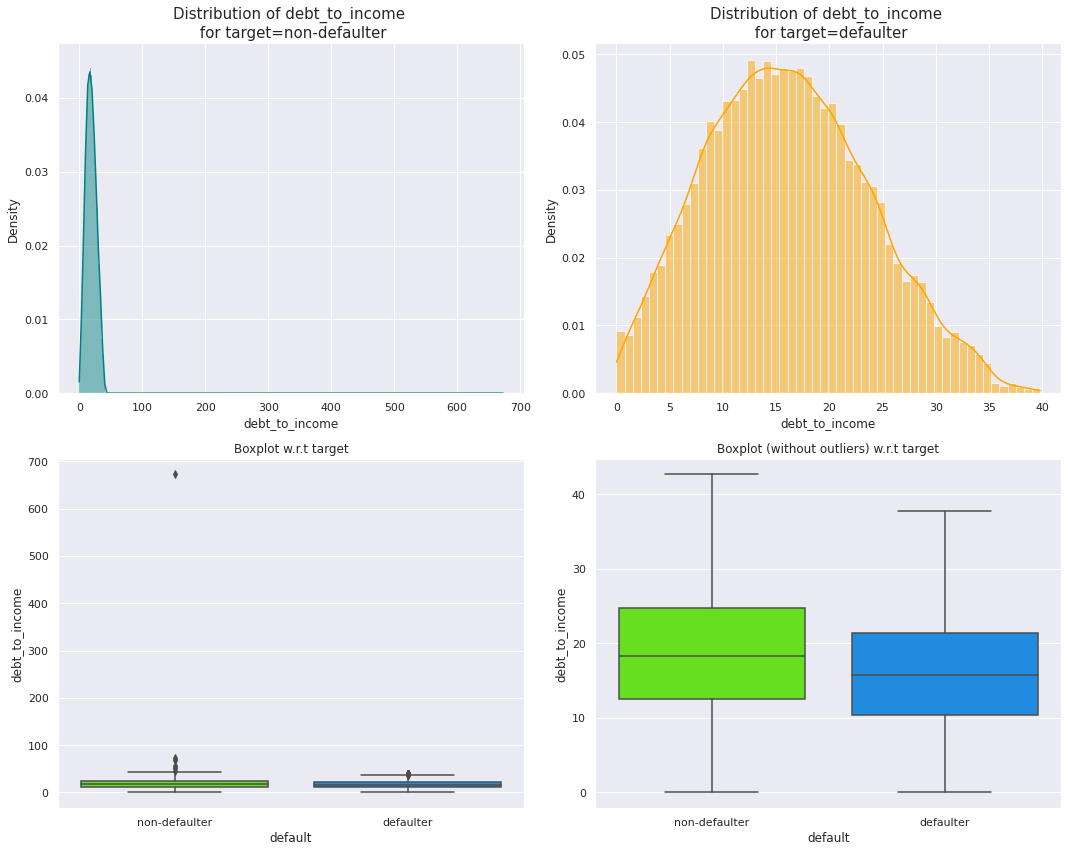

In [60]:
distribution_plot_wrt_target(df, "debt_to_income", "default")

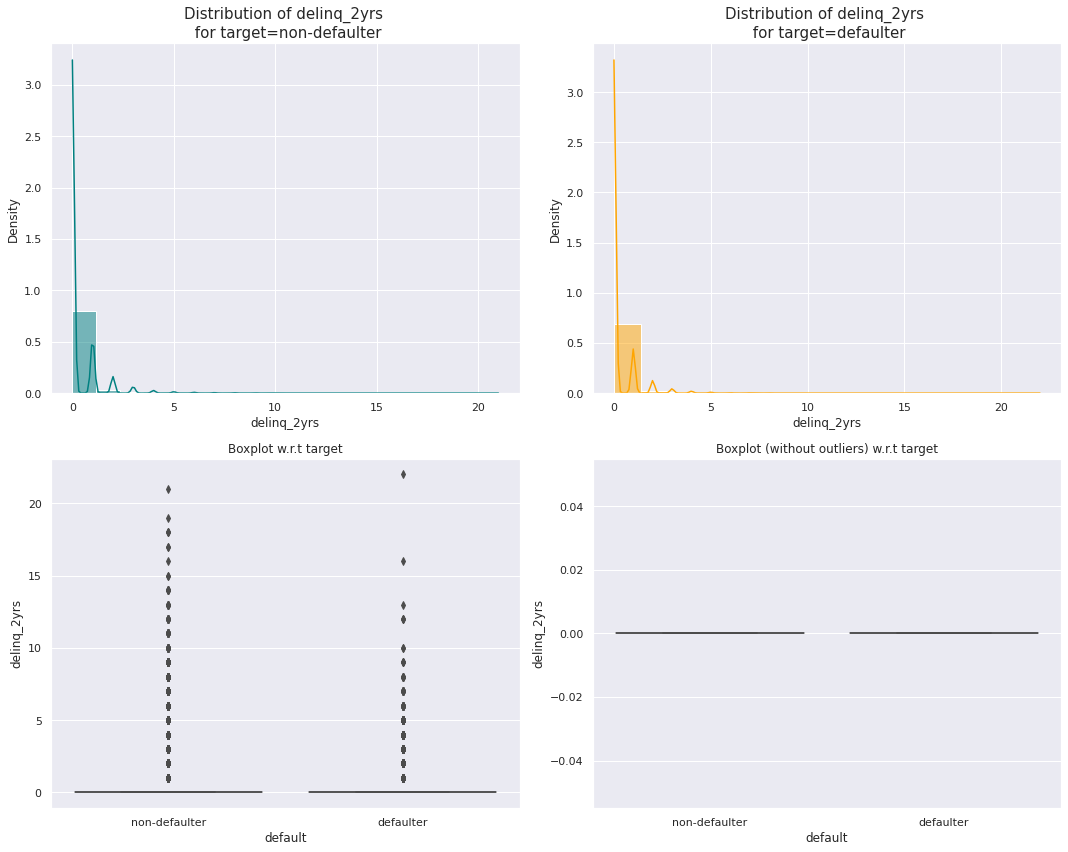

In [61]:
distribution_plot_wrt_target(df, "delinq_2yrs", "default")

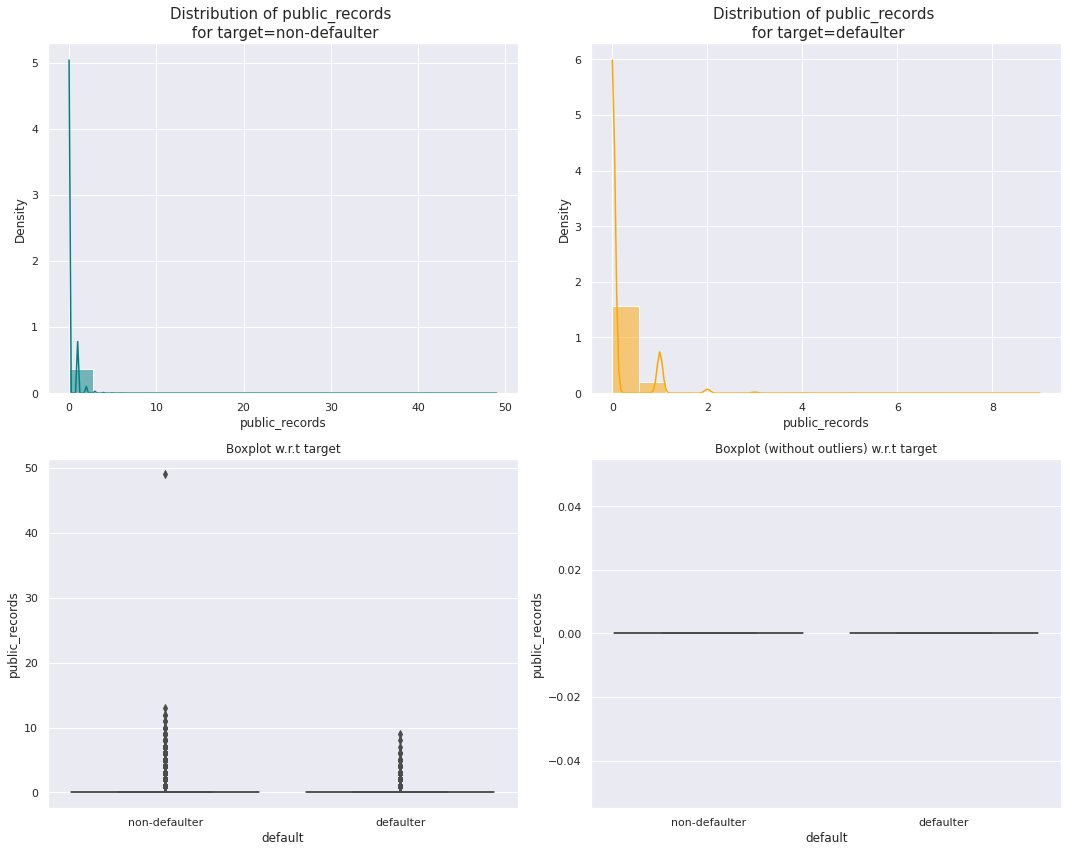

In [62]:
distribution_plot_wrt_target(df, "public_records", "default")

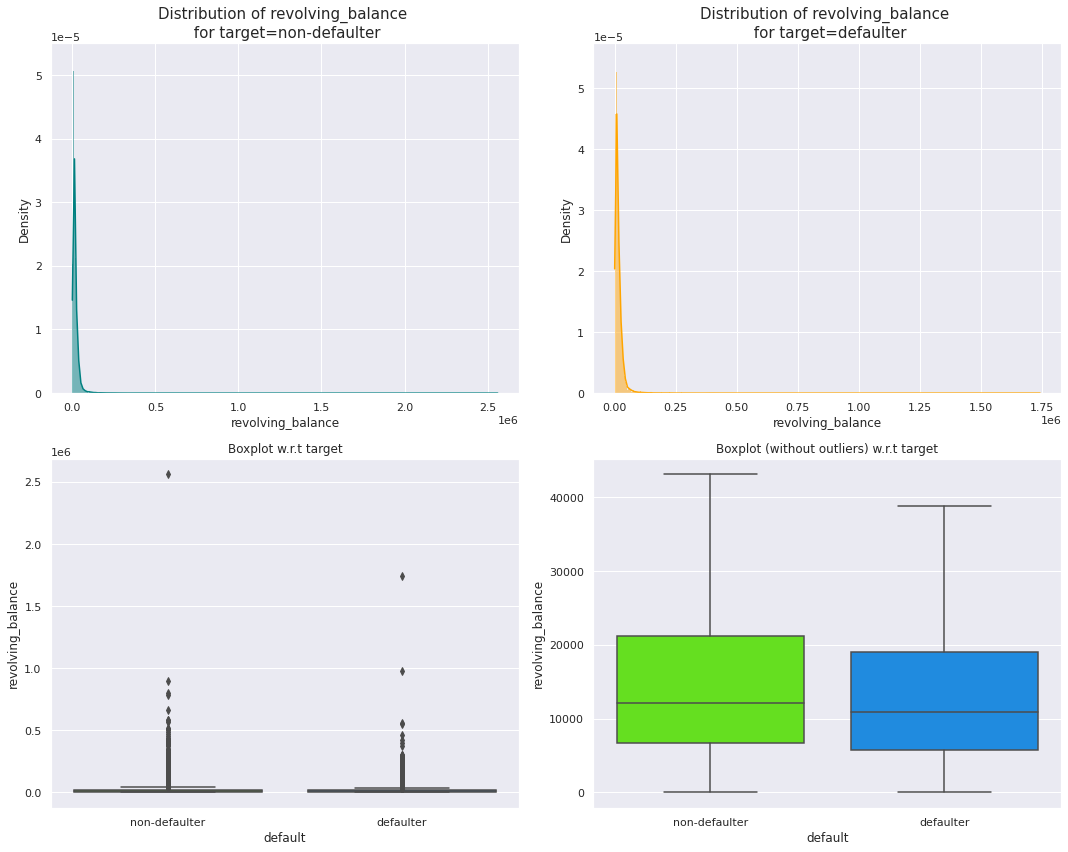

In [63]:
distribution_plot_wrt_target(df, "revolving_balance", "default")

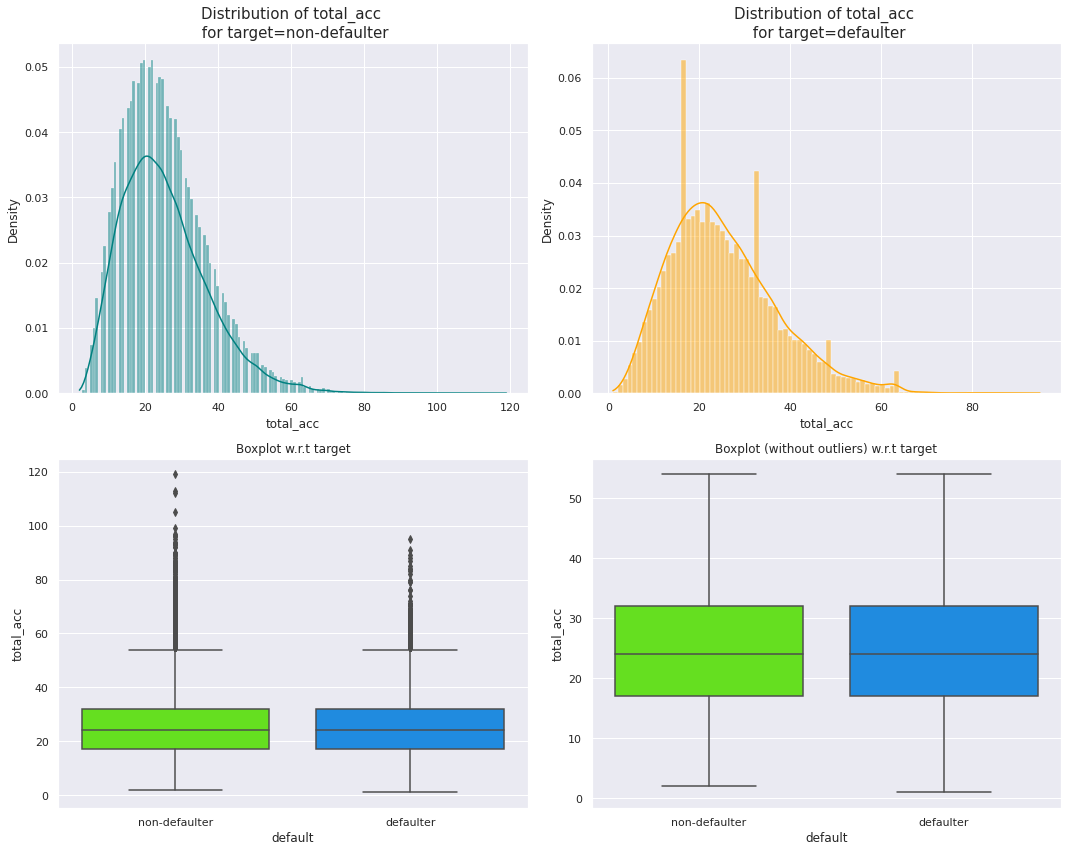

In [64]:
distribution_plot_wrt_target(df, "total_acc", "default")

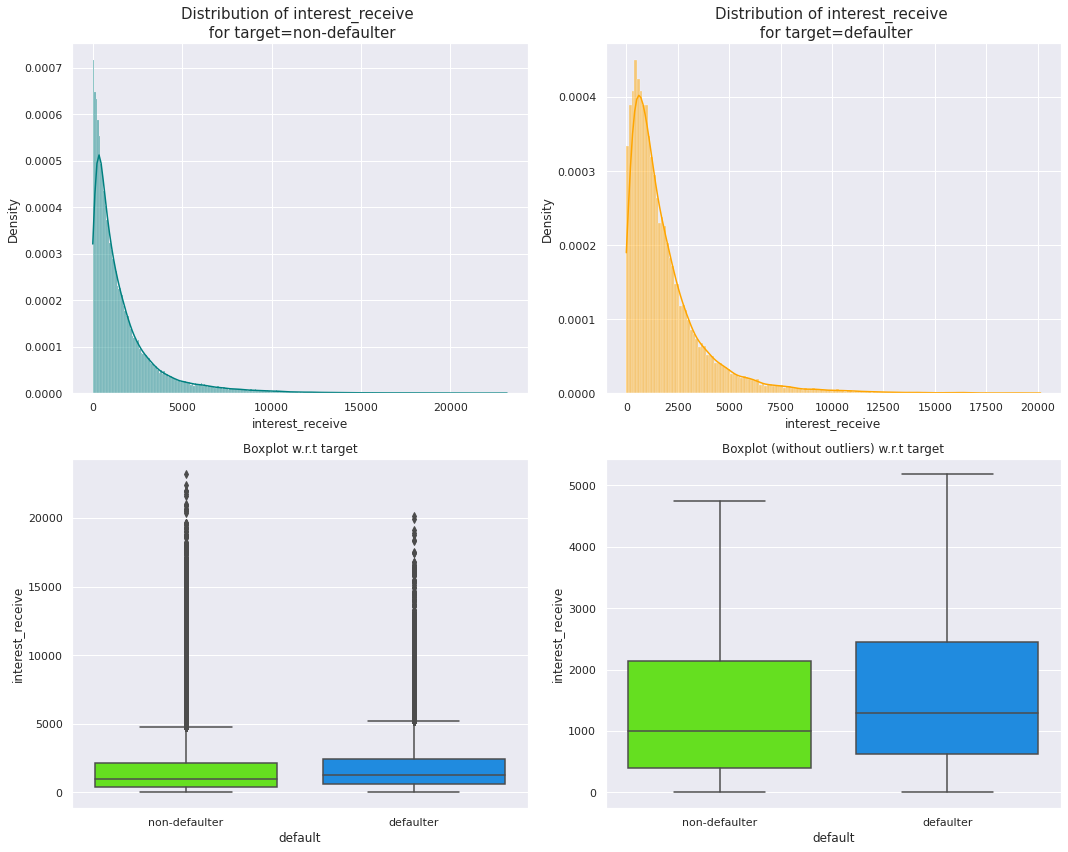

In [65]:
distribution_plot_wrt_target(df, "interest_receive", "default")

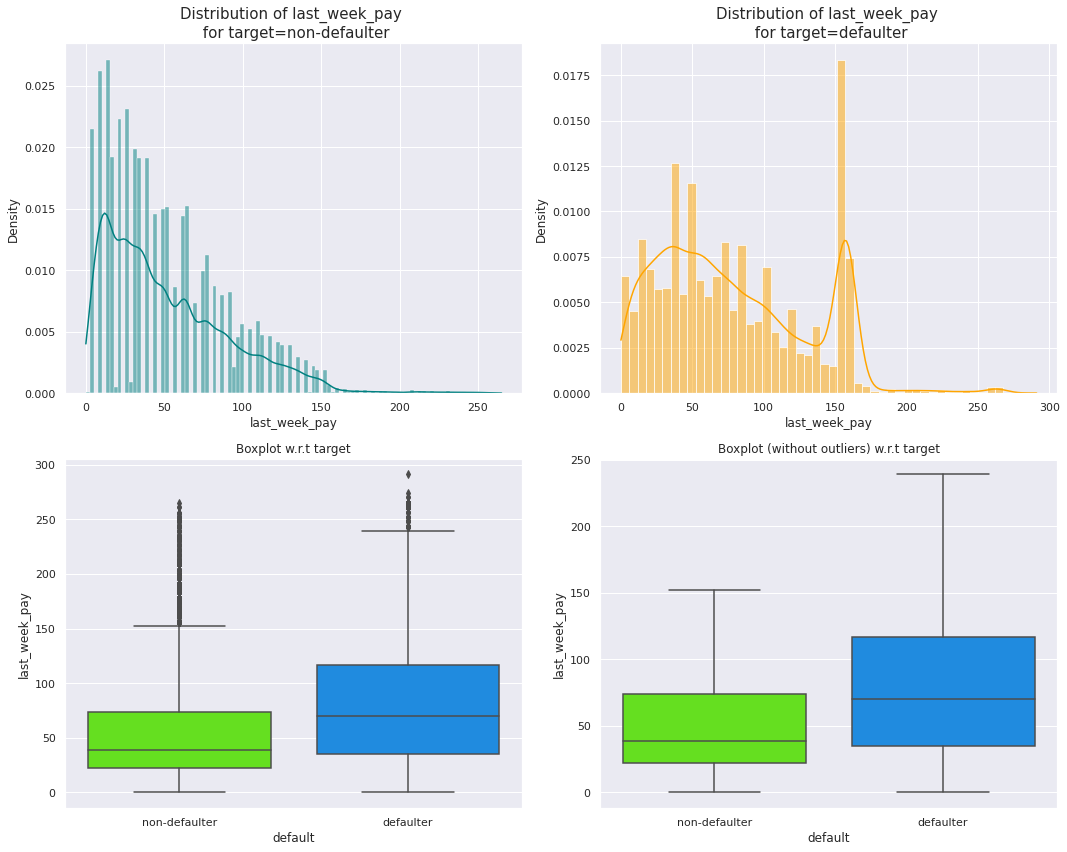

In [66]:
distribution_plot_wrt_target(df, "last_week_pay", "default")

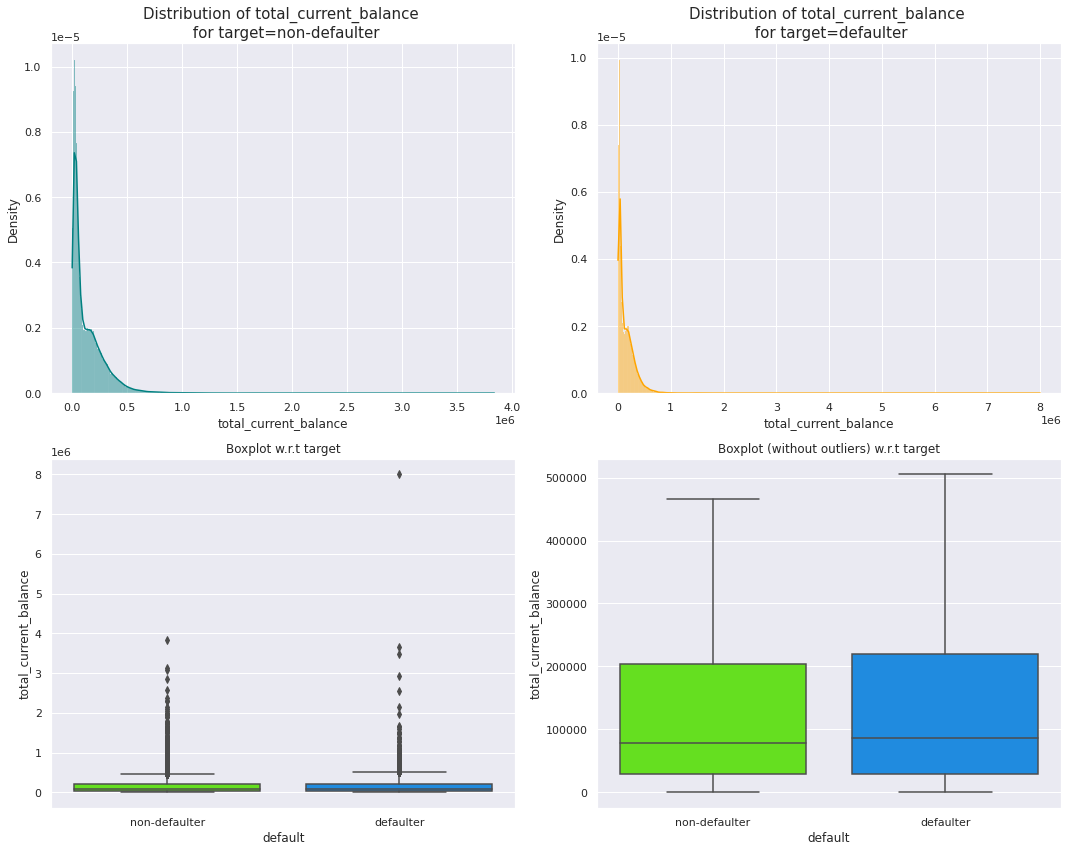

In [67]:
distribution_plot_wrt_target(df, "total_current_balance", "default")

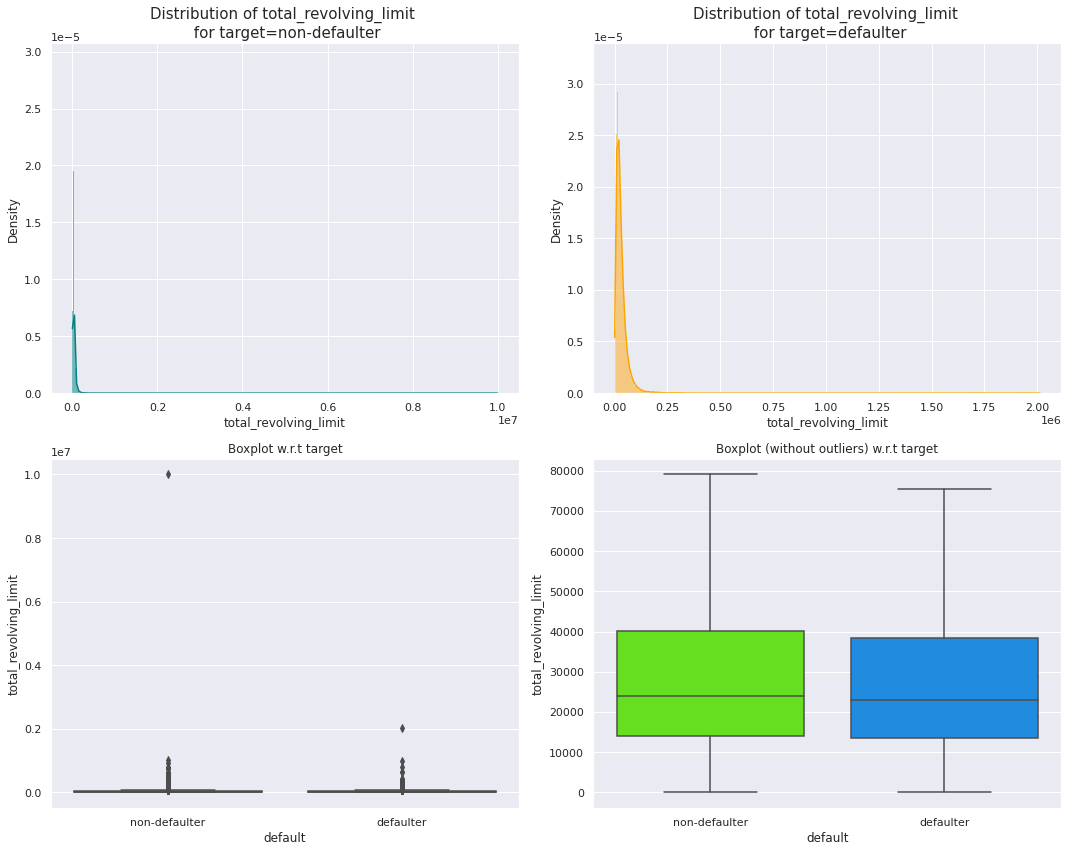

In [68]:
distribution_plot_wrt_target(df, "total_revolving_limit", "default")

# Data Pre-Processing


### Outlier detection and treatment
- Let's check for outliers in the data.

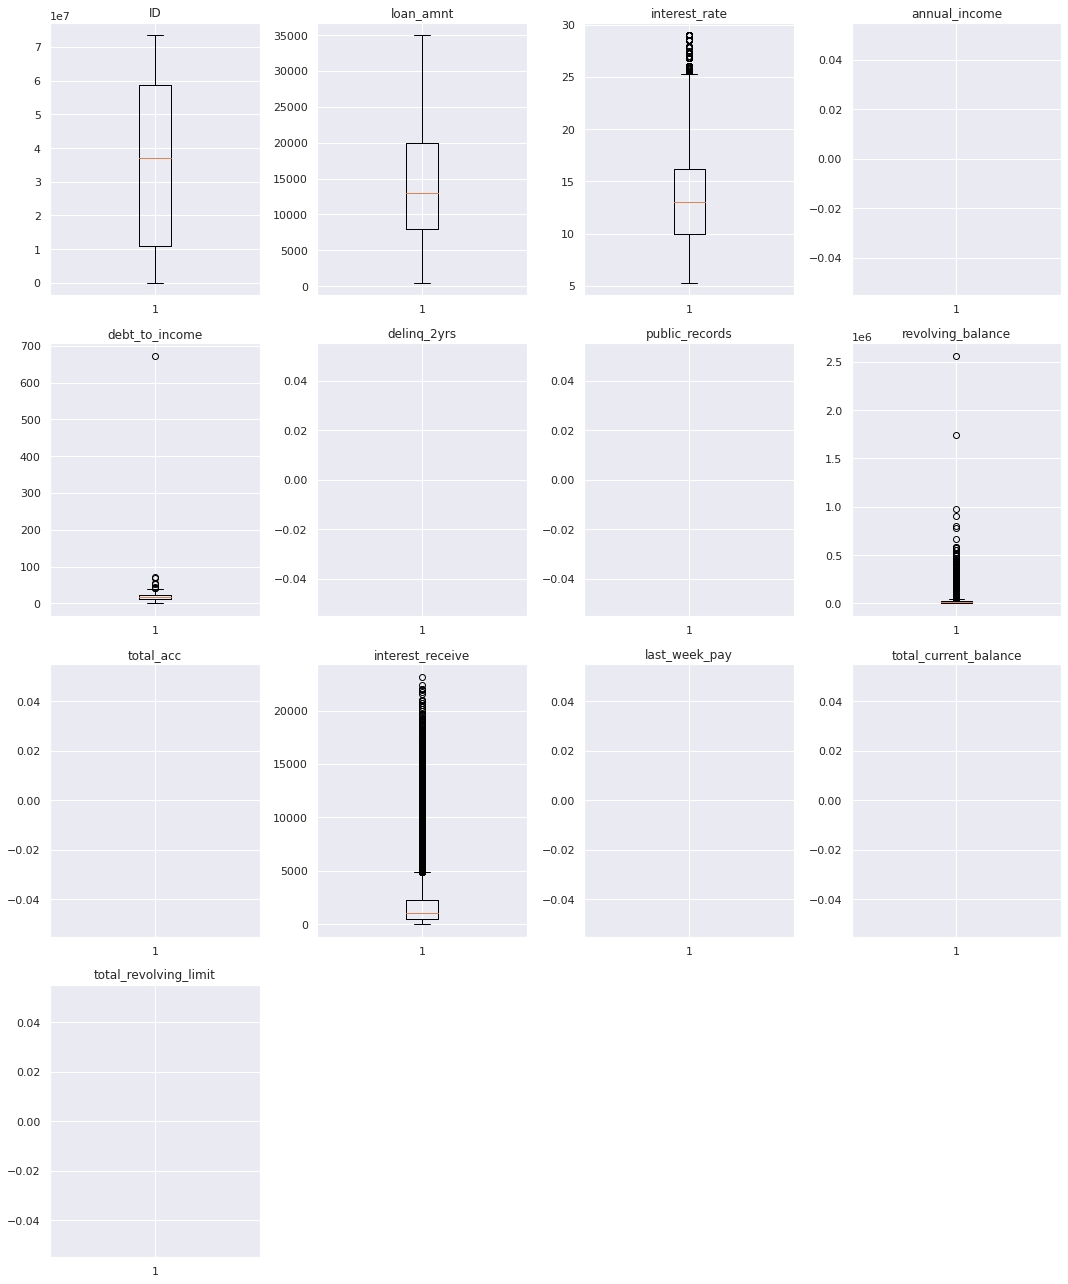

In [69]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 18))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Some of the columns have outliers

### Let's find the percentage of outliers, in each column of the data, using IQR.

In [70]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

# Percentage of outliers in each column
((df[numeric_columns] < lower_whisker) | (df[numeric_columns] > upper_whisker)).sum()/df.shape[0]*100


ID                        0.000000
loan_amnt                 0.000000
interest_rate             0.654689
annual_income             4.508769
debt_to_income            0.009659
delinq_2yrs              19.165218
public_records           15.281087
revolving_balance         5.413527
total_acc                 2.092859
interest_receive          7.261682
last_week_pay             0.763088
total_current_balance     3.161826
total_revolving_limit     5.325520
dtype: float64

### Creating a function to floor and cap/clip outliers in a column

In [71]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

### Treating outliers in last_week_pay column

In [72]:
df = treat_outliers(df, "last_week_pay")

**Treating outliers in interest_rate column**

In [73]:
df = treat_outliers(df, "interest_rate")

- We will not be treating the outliers in the other columns since all are genuine values

**Let's encode defaulters to 1 and non-defaulters as 0 for further analysis**

In [74]:
df["default"] = df["default"].apply(lambda x: 1 if x == "defaulter" else 0)

In [75]:
df["default"].value_counts()

0    71045
1    22129
Name: default, dtype: int64

## Treating Missing Values

In [76]:
df.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

In [77]:
#Extracting the numeric column names into a list
num_col = df.select_dtypes(include=np.number).columns.tolist()

In [78]:
#replacing the missing values for numeric data ith their median values
medianFiller = lambda x: x.fillna(x.median())
df[num_col] = df[num_col].apply(medianFiller, axis=0)

In [79]:
# Treating missing values of categorical variable
# fist of all i will find the most frequent value inthe column ith missing data
df["job_experience"].mode()

0    <5 Years
dtype: object

In [80]:
# replacing the NaN value ith the mode value
df["job_experience"] = df["job_experience"].fillna("<5 Years")

In [81]:
# Checking for missing values again
df.isnull().sum()

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
default                       0
dtype: int64

- No There are no missing values in our dataset

## Data Preparation

In [82]:
#dropping the ID column because it irrelevant to our model training
df = df.drop(["ID"], axis=1)

In [83]:
# Separating the features from the target variable
X = df.drop(["default"], axis=1)
Y = df["default"]


# creating dummies
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)


# Splitting data in train and test sets
X_train, X_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [84]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_val.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_val.value_counts(normalize=True))

Shape of Training set :  (65221, 112)
Shape of test set :  (27953, 112)
Percentage of classes in training set:
0    0.7625
1    0.2375
Name: default, dtype: float64
Percentage of classes in test set:
0    0.762494
1    0.237506
Name: default, dtype: float64


## Model performance evaluation

- If we predict a defaulting customer as a non-defaulter, bank would lose an money because the customer actually defaulted. (ie False Negative) **This is more important and we need to reduce False Negatives**
#### How to reduce this loss
- recall should be maximized, the greater the recall higher the chances of minimizing the false negatives.


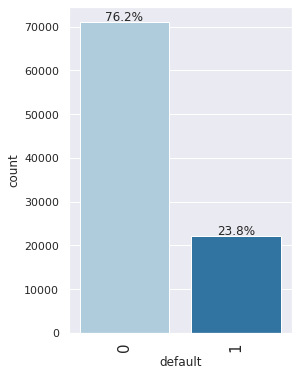

In [85]:
# Observing the distribution of tatget variable
labeled_barplot(df, "default", perc=True)

Since I am more interested with the defaulter and from the graph above, the dataIe have is 76% for non-defaulters and 23.8% for defaulters, that means my model will have a bias in favour of the non defaulter. to solve this, I will employ oversampling and undersampling techniques

### Oversampling train data using SMOTE

In [86]:
# OVERSAMPLING OUR DATA
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 15490
Before OverSampling, counts of label '0': 49731 

After OverSampling, counts of label '1': 49731
After OverSampling, counts of label '0': 49731 

After OverSampling, the shape of train_X: (99462, 112)
After OverSampling, the shape of train_y: (99462,) 



### Undersampling train data using Random Undersampler

In [87]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label '1': 15490
Before Under Sampling, count of label '0': 49731 

After Under Sampling, count of label '1': 15490
After Under Sampling, count of label '0': 15490 

After Under Sampling, the shape of train_X: (30980, 112)
After Under Sampling, the shape of train_y: (30980,) 



In [88]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

In [89]:
# defining a confusion matrix function


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Decision Tree Classifier with oversampled data

In [90]:
dtree1 = DecisionTreeClassifier(random_state=1, max_depth=4)

# training the decision tree model with oversampled training set
dtree1.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=4, random_state=1)

##### checking the performance on the oversampled train and validation sets

In [91]:
# Predicting the target for train and validation set
pred_train = dtree1.predict(X_train_over)
pred_val = dtree1.predict(X_val)

In [92]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_over, pred_train))
print(recall_score(y_val, pred_val))

0.7561480766523898
0.5580659737912336


In [93]:
# Checking the performance of model on training data
dtree_untuned = model_performance_classification_sklearn(
    dtree1, X_train_over, y_train_over
)
dtree_untuned

,Accuracy,Recall,Precision,F1
0,0.721833,0.756148,0.707587,0.731062


In [94]:
# Checking the performance of model on validation data
dtree_untuned_val = model_performance_classification_sklearn(dtree1, X_val, y_val)
dtree_untuned_val

,Accuracy,Recall,Precision,F1
0,0.65095,0.558066,0.351919,0.431642


- The model is overfitting the training data

**looking at the confusion matrices of the train and validation data**

Text(39.5, 0.5, 'Actual Values')

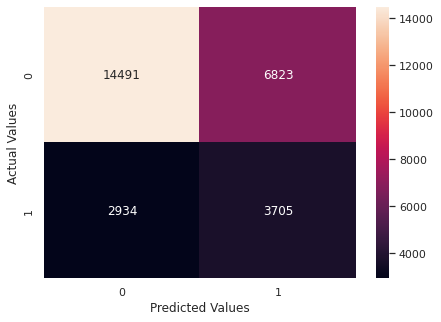

In [95]:
# Confusion matrix for oversampled train data
cm = confusion_matrix(y_val, pred_val)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

## Tuning Decision tree model with oversampled data

In [96]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=recall_score,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=nan:


In [97]:
# choosing the best estimator as the model
dtree_tuned_over = randomized_cv.best_estimator_

# fitting the model with the best estimator
dtree_tuned_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, random_state=1)

In [98]:
# Checking the performance of model on training data
dtree_tuned_train_over_perf = model_performance_classification_sklearn(
    dtree_tuned_over, X_train_over, y_train_over
)
dtree_tuned_train_over_perf

,Accuracy,Recall,Precision,F1
0,0.721833,0.756148,0.707587,0.731062


In [99]:
# Checking the performance of model on validation data
dtree_tuned_val_over_perf = model_performance_classification_sklearn(
    dtree_tuned_over, X_val, y_val
)
dtree_tuned_val_over_perf

,Accuracy,Recall,Precision,F1
0,0.65095,0.558066,0.351919,0.431642


- The model is overfitting the trraining data

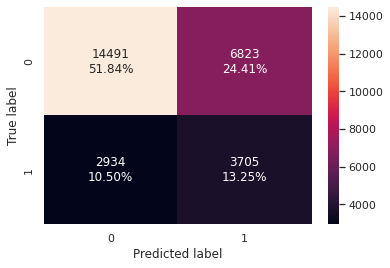

In [100]:
# Confusion matrix for oversampled train data
confusion_matrix_sklearn(dtree_tuned_over, X_val, y_val)

### importance of features in the tree building

['loan_amnt', 'interest_rate', 'annual_income', 'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc', 'interest_receive', 'last_week_pay', 'total_current_balance', 'total_revolving_limit', 'loan_term_5 years', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G', 'loan_subgrade_A2', 'loan_subgrade_A3', 'loan_subgrade_A4', 'loan_subgrade_A5', 'loan_subgrade_B1', 'loan_subgrade_B2', 'loan_subgrade_B3', 'loan_subgrade_B4', 'loan_subgrade_B5', 'loan_subgrade_C1', 'loan_subgrade_C2', 'loan_subgrade_C3', 'loan_subgrade_C4', 'loan_subgrade_C5', 'loan_subgrade_D1', 'loan_subgrade_D2', 'loan_subgrade_D3', 'loan_subgrade_D4', 'loan_subgrade_D5', 'loan_subgrade_E1', 'loan_subgrade_E2', 'loan_subgrade_E3', 'loan_subgrade_E4', 'loan_subgrade_E5', 'loan_subgrade_F1', 'loan_subgrade_F2', 'loan_subgrade_F3', 'loan_subgrade_F4', 'loan_subgrade_F5', 'loan_subgrade_G1', 'loan_subgrade_G2', 'loan_subgrade_G3', 'loan_subgrade_G4', 'lo

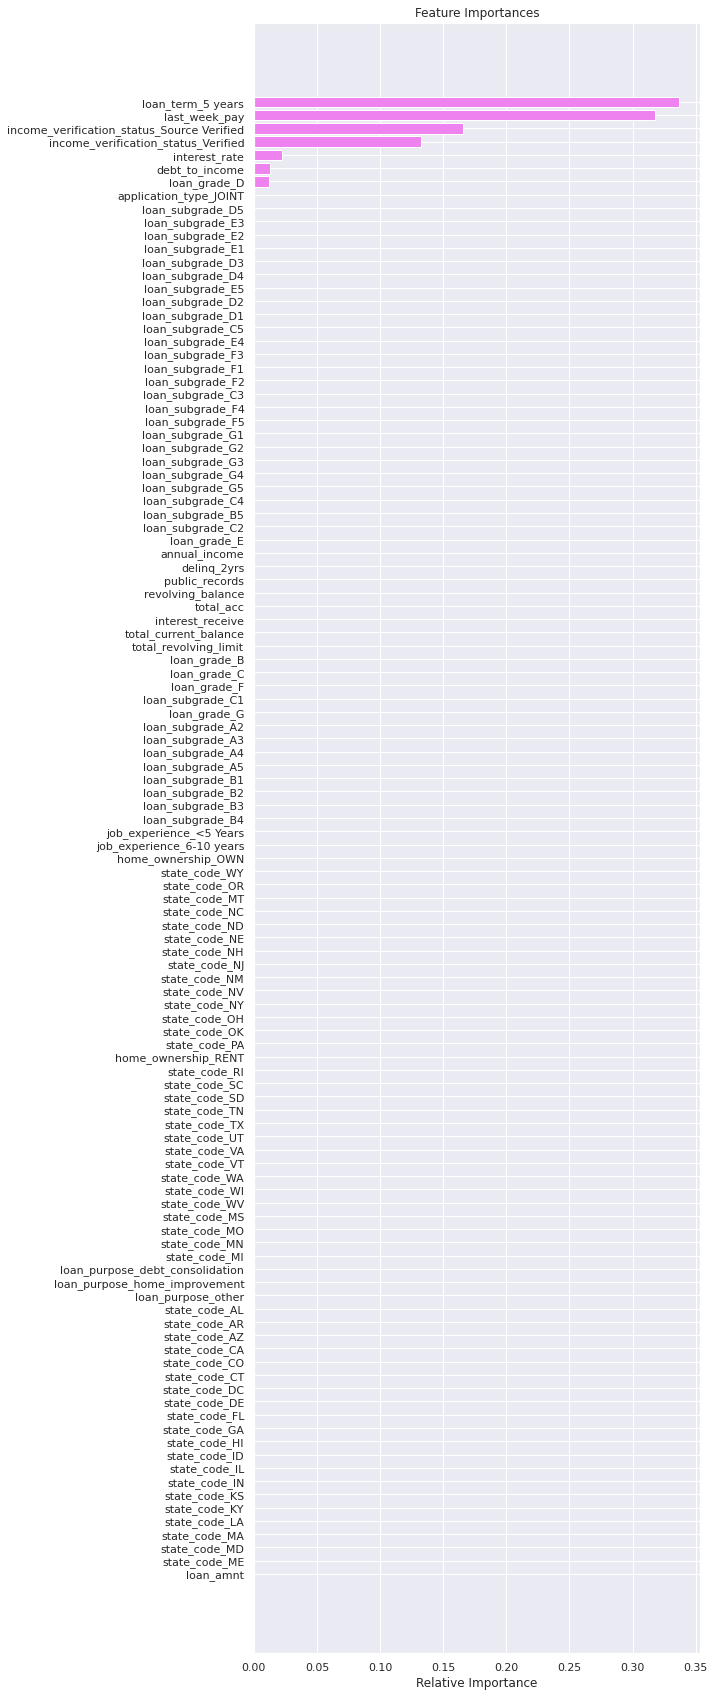

In [101]:
feature_names = list(X.columns)
print(feature_names)

importances = dtree_tuned_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 30))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Tuning Decision tree model with undersampled data

In [102]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=recall_score,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=nan:


In [103]:
# choosing the best estimator as the model
dtree_tuned_under = randomized_cv.best_estimator_

# fitting the model with the best estimator
dtree_tuned_under.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, random_state=1)

In [104]:
# Checking the performance of model on training data
dtree_tuned_train_under_perf = model_performance_classification_sklearn(
    dtree_tuned_under, X_train_un, y_train_un
)
dtree_tuned_train_under_perf

,Accuracy,Recall,Precision,F1
0,0.635119,0.406068,0.749345,0.526712


In [105]:
# Checking the performance of model on validation data
dtree_tuned_val_under_perf = model_performance_classification_sklearn(
    dtree_tuned_under, X_val, y_val
)
dtree_tuned_val_under_perf

,Accuracy,Recall,Precision,F1
0,0.751368,0.396445,0.472108,0.430981


- This is relatively a poor model compared to the others created so far

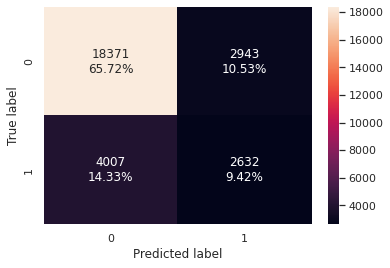

In [106]:
# Creating the confusion matrix
confusion_matrix_sklearn(dtree_tuned_under, X_val, y_val)

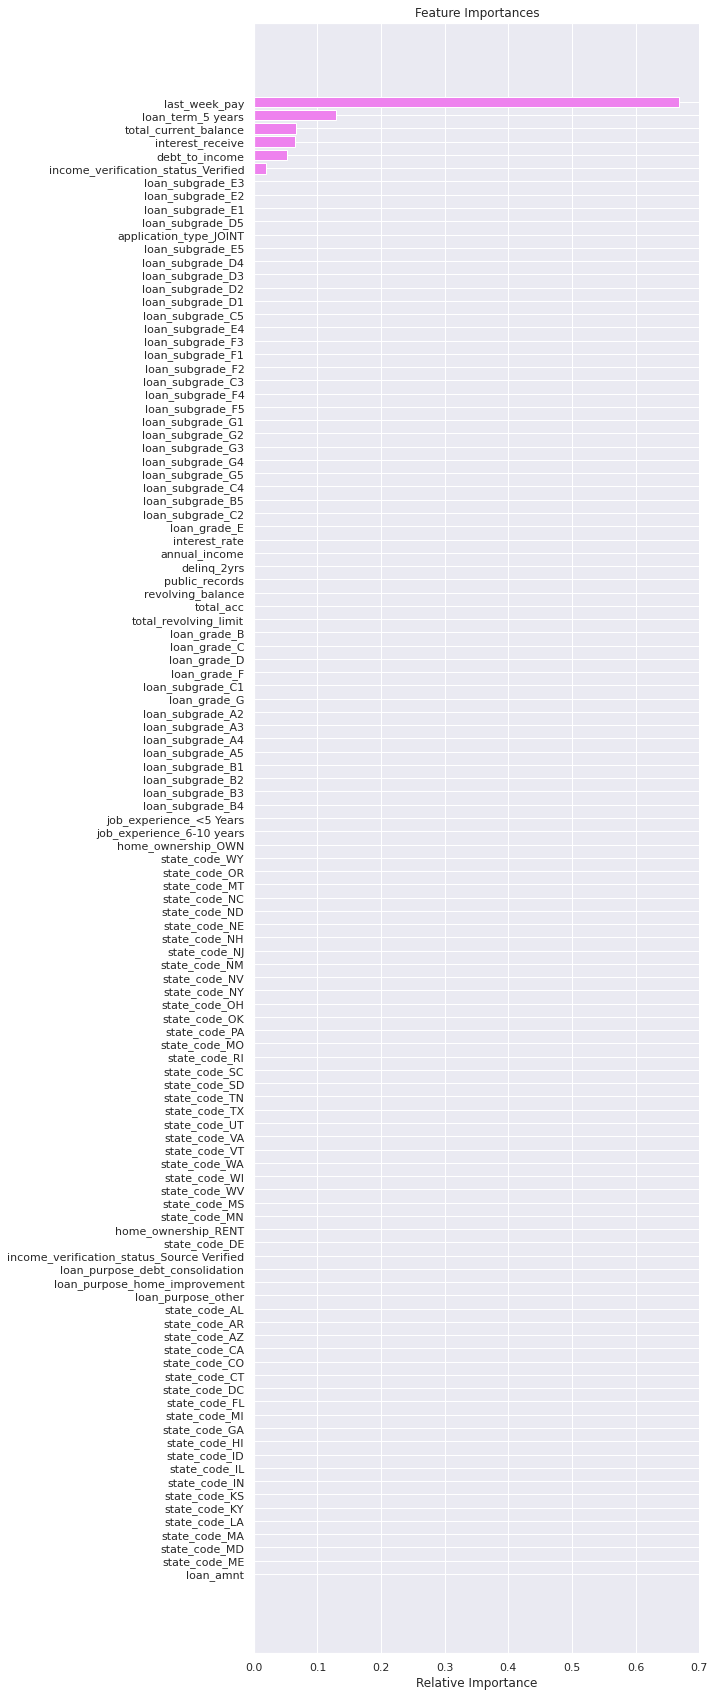

In [107]:
# importance of features in the tree building

importances = dtree_tuned_under.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 30))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Bagging - Model Building and Hyperparameter Tuning
### Bagging Classifier

In [108]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

In [109]:
# checking performance on train data for bagging classifier
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train_over, y_train_over
)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.991444,0.984396,0.99847,0.991383


In [110]:
# checking performance on val data for bagging classifier
bagging_classifier_model_val_perf = model_performance_classification_sklearn(
    bagging_classifier, X_val, y_val
)
bagging_classifier_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.837799,0.49887,0.732906,0.593655


- The model is overfitting the training data.
- Not a good model for prediction

## Hyperparameter Tuning - Bagging Classifier

In [111]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_samples": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": [30, 50, 70],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-1,
    scoring=recall_score,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 30, 'max_samples': 0.8, 'max_features': 0.7} with CV score=nan:


In [112]:
# choosing the best estimator as the model
BGC_tuned_under = randomized_cv.best_estimator_

# fitting the model with the best estimator
BGC_tuned_under.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=30,
                  random_state=1)

In [113]:
# Checking the performance of model on training data
BGC_tuned_train_under_perf = model_performance_classification_sklearn(
    BGC_tuned_under, X_train_un, y_train_un
)
BGC_tuned_train_under_perf

,Accuracy,Recall,Precision,F1
0,0.997192,0.995933,0.998447,0.997188


In [114]:
# Checking the performance of model on validation data
BGC_tuned_val_under_perf = model_performance_classification_sklearn(
    BGC_tuned_under, X_val, y_val
)
BGC_tuned_val_under_perf

,Accuracy,Recall,Precision,F1
0,0.784173,0.69167,0.535323,0.603536


- Again the model is overfitting the training data

# Support Vector Machine(SVM) Classifier

In [115]:
SVM_clf = svm.SVC(kernel="rbf")
SVM_clf.fit(X_train_un, y_train_un)

SVC()

In [116]:
# Checking the performance of model on training data
SVM_clf_untuned = model_performance_classification_sklearn(
    SVM_clf, X_train_un, y_train_un
)
SVM_clf_untuned

,Accuracy,Recall,Precision,F1
0,0.593544,0.496385,0.616106,0.549803


In [117]:
# Checking the performance of model on validation data
SVM_clf_untuned_VAL = model_performance_classification_sklearn(
    SVM_clf, X_val, y_val
)
SVM_clf_untuned_VAL

,Accuracy,Recall,Precision,F1
0,0.63825,0.491339,0.326298,0.392162


# LOGISTIC REGRESSION with undersampled data

In [118]:
Logit = LogisticRegression(C=0.01, solver="liblinear")
Logit.fit(X_train_un, y_train_un)

LogisticRegression(C=0.01, solver='liblinear')

In [119]:
# Checking the performance of model on training data
logit_train_under_perf = model_performance_classification_sklearn(
    Logit, X_train_un, y_train_un
)
logit_train_under_perf

,Accuracy,Recall,Precision,F1
0,0.632376,0.598903,0.641874,0.619644


In [120]:
# Checking the performance of model on validation data
logit_val_under_perf = model_performance_classification_sklearn(Logit, X_val, y_val)
logit_val_under_perf

,Accuracy,Recall,Precision,F1
0,0.651057,0.60235,0.359849,0.450541


# Tuning XGBoost model using undersampled data

In [121]:
# converting the training data into the right xgboost format 
X_train_un_xgb = X_train_un.values
y_train_un_xgb = y_train_un.values

X_val_xgb = X_val.values
y_val_xgb = y_val.values
 

# Defining the recall score
scorer = metrics.make_scorer(metrics.recall_score)


In [122]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}


# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-1,
    scoring= metrics.make_scorer(metrics.recall_score),
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un_xgb, y_train_un_xgb)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9979341510652034:


In [123]:
# choosing the best estimator as the model
XGB_tuned_under = randomized_cv.best_estimator_

# fitting the model with the best estimator
XGB_tuned_under.fit(X_train_un_xgb, y_train_un_xgb)

XGBClassifier(eval_metric='logloss', gamma=3, n_estimators=150, random_state=1,
              scale_pos_weight=10, subsample=0.9)

In [124]:
# Checking the performance of model on training data
XGB_tuned_under_train_perf = model_performance_classification_sklearn(
    XGB_tuned_under, X_train_un_xgb, y_train_un_xgb
)
XGB_tuned_under_train_perf

,Accuracy,Recall,Precision,F1
0,0.534022,0.998903,0.51763,0.6819


In [125]:
# Checking the performance of model on validation data
XGB_tuned_under_val_perf = model_performance_classification_sklearn(
    XGB_tuned_under, X_val_xgb, y_val_xgb
)
XGB_tuned_under_val_perf

,Accuracy,Recall,Precision,F1
0,0.285157,0.997741,0.249107,0.398676


- This is by far the best model so far wit high recall on both the training and validation set and no overfitting

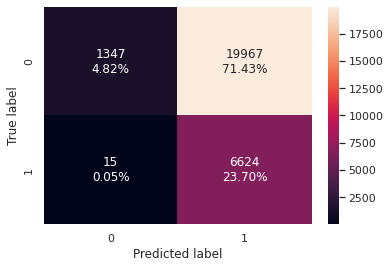

In [126]:
# Creating the confusion matrix
confusion_matrix_sklearn(XGB_tuned_under, X_val_xgb, y_val_xgb)

# Comparison of Models and Final Model Selection

In [127]:
XGB_tuned_under_train_perf

,Accuracy,Recall,Precision,F1
0,0.534022,0.998903,0.51763,0.6819


In [128]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_untuned,
        dtree_tuned_train_over_perf,
        dtree_tuned_train_under_perf,
        bagging_classifier_model_train_perf,
        BGC_tuned_train_under_perf,
        SVM_clf_untuned,
        logit_train_under_perf,
        XGB_tuned_under_train_perf
    ],
    axis=0,
)
models_train_comp_df.index = [
    "Decision Tree sklearn",
    "Decision Tree (over-sampled)",
    "Decision Tree (under-sampled)",
    "Bagging classifier",
    "Bagging Tuned",
    "SVM Classifier",
    "Logistics Regression",
    "XGBoost Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Accuracy,Recall,Precision,F1
Decision Tree sklearn,0.721833,0.756148,0.707587,0.731062
Decision Tree (over-sampled),0.721833,0.756148,0.707587,0.731062
Decision Tree (under-sampled),0.635119,0.406068,0.749345,0.526712
Bagging classifier,0.991444,0.984396,0.998470,0.991383
Bagging Tuned,0.997192,0.995933,0.998447,0.997188
SVM Classifier,0.593544,0.496385,0.616106,0.549803
Logistics Regression,0.632376,0.598903,0.641874,0.619644
XGBoost Classifier,0.534022,0.998903,0.517630,0.681900


In [129]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        dtree_untuned_val,
        dtree_tuned_val_over_perf,
        dtree_tuned_val_under_perf,
        bagging_classifier_model_val_perf,
        BGC_tuned_val_under_perf,
        SVM_clf_untuned_VAL,
        logit_val_under_perf,
        XGB_tuned_under_val_perf,
    ],
    axis=0,
)
models_val_comp_df.index = [
    "Decision Tree sklearn",
    "Decision Tree (over-sampled)",
    "Decision Tree (under-sampled)",
    "Bagging classifier",
    "Bagging Tuned",
    "SVM Classifier",
    "Logistics Regression",
    "XGBoost Classifier"
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Accuracy,Recall,Precision,F1
Decision Tree sklearn,0.650950,0.558066,0.351919,0.431642
Decision Tree (over-sampled),0.650950,0.558066,0.351919,0.431642
Decision Tree (under-sampled),0.751368,0.396445,0.472108,0.430981
Bagging classifier,0.837799,0.498870,0.732906,0.593655
Bagging Tuned,0.784173,0.691670,0.535323,0.603536
SVM Classifier,0.638250,0.491339,0.326298,0.392162
Logistics Regression,0.651057,0.602350,0.359849,0.450541
XGBoost Classifier,0.285157,0.997741,0.249107,0.398676


**The Xgboost model performed extremely well compared to other models and will be used as our final model**

In [130]:
# DEINING THE FINAL MODEL
final_model = XGB_tuned_under

# Important Features

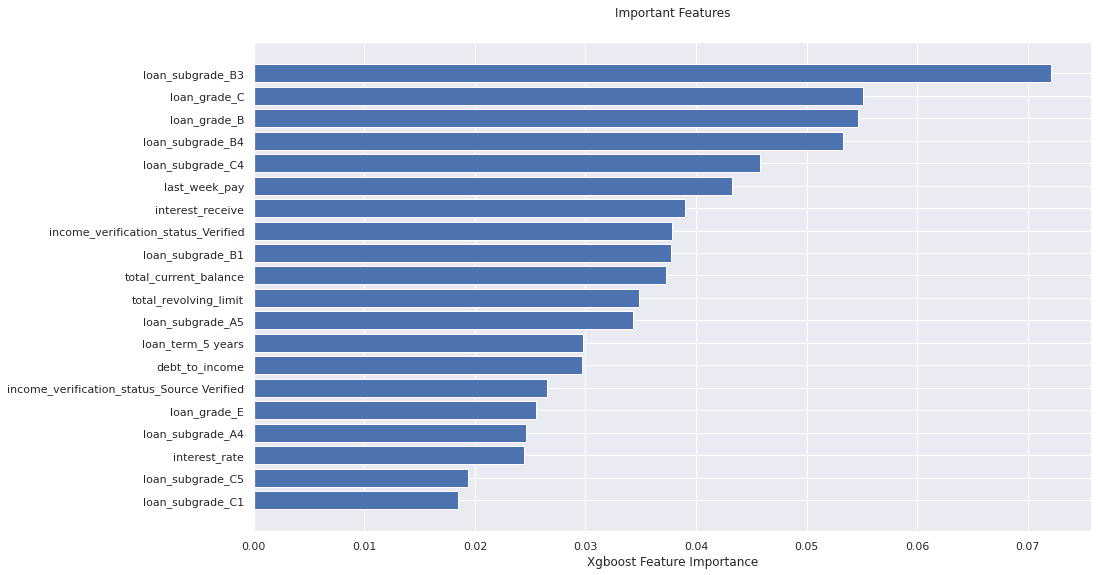

In [131]:
#Plotting the 20 most important features for XGBoost

plt.figure(figsize=(15, 9))
sorted_idx = final_model.feature_importances_.argsort()

df_feature_imp = pd.DataFrame({"Features":X_train.columns[sorted_idx], "Importance":final_model.feature_importances_[sorted_idx]})

df_feature_imp=df_feature_imp.tail(20)#.sort_values(by=["Importance"], inplace=True)
df_feature_imp

plt.barh(df_feature_imp["Features"], df_feature_imp["Importance"])

#plt.barh(X_train.columns[sorted_idx], final_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.title("Important Features", y=1.04)
plt.show()

# PREPARING THE TEST DATA FOR PREDICITION

In [132]:
#Reading the test data
uploaded = files.upload()

test_data = pd.read_csv(io.StringIO(uploaded['Test_set.csv'].decode('utf-8')))

Saving Test_set.csv to Test_set.csv


In [133]:
# making a copy of the test data
df_test = test_data.copy()

In [134]:
#chcking missing values
df_test.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                2089
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                  806
total_current_balance         3230
total_revolving_limit         3230
dtype: int64

In [135]:
# treating missing values
# Extracting the numeric column names into a list
num_col = df_test.select_dtypes(include=np.number).columns.tolist()

In [136]:
# replacing the missing values for numeric data ith their median values
medianFiller = lambda x: x.fillna(x.median())
df_test[num_col] = df_test[num_col].apply(medianFiller, axis=0)

In [137]:
# Treating missing values of categorical variable
df_test["job_experience"].mode()

0    <5 Years
dtype: object

In [138]:
# replacing the NaN value ith the mode value
df_test["job_experience"] = df_test["job_experience"].fillna("<5 Years")

In [139]:
df.isnull().sum()

loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
default                       0
dtype: int64

In [140]:
# Dropping irrelevant columns
df_test = df_test.drop(["ID"], axis=1)
#df_test = df_test.drop(["state_code"], axis=1)

In [141]:
# treating outliers
df_test = treat_outliers(df_test, "last_week_pay")
df_test = treat_outliers(df_test, "interest_rate")

In [142]:
# Replacing The "OTHER", "NONE" values with the mode
df_test["home_ownership"] = df_test["home_ownership"].replace(
    ["OTHER", "NONE"], "MORTGAGE"
)

In [143]:
# making a copy of clean test data for dummy variable
XX = df_test.copy()

In [144]:
# CREATION DUMMY VARIABLES
XX = pd.get_dummies(
    XX,
    columns=XX.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

In [145]:
# Checkin the shape od XX
XX.shape

(39933, 112)

## Making Prediction with the XGBoost model

In [146]:
#Since the final model in an XGBoost model. the test data will be converted to the right format for prediction
XX_xgb=XX.values
pred_test = final_model.predict(XX_xgb)

In [147]:
ID = test_data["ID"].tolist()

In [148]:
output = pred_test.tolist()

In [149]:
df_result = pd.DataFrame({"ID": ID, "default": output})

In [150]:
df_result.head()

,ID,default
0,4855329,1
1,66862420,1
2,3637416,1
3,53682249,1
4,53937165,1


In [151]:
df_result.shape

(39933, 2)

In [152]:
df_result.to_csv('/content/drive/My Drive/my_predictions.csv', encoding='utf-8', index=False)

# Summary of data analysis and visualization and Feature Importance
## Data analysis
- 70% of the loans given are on a 3 years loan term
- The highest grade of loan taken is grade B. 28.8%
- The least fragde is grade G. (0.6%)
- 43.6% of the borrowers have less than 5 years job experence
- Almost 50% of customers that requested for loans have their homes on mortgage
- 30.3% of the borrowers don't have verified income
- 59% of the requested loans are for debt consolidation purposes
- 76.2% of the borrowers did not default on their loan
- 23.8% of the borrowers actually defaulted
- Revolving balance and total revolving limits have a high positive correlation
- The Loan amount and interest received have a podsitive correlation
- Revolving balance and total current balance have a strong positive correlation
- Higher amounts of loans are taken by the grade G
- 27.39% of the borowers with the 3 years loan term defaulted
- 15.24% of the borowers with the 5 years loan term defaulted
- Majority of the defaulters have between 0 to 10 years work experience
- About 28% of borrowers with unverified income status defualted

## Feature Importance
#### parameters that play an important role in determining whether a client will default on the loan payment or not based on our model
- Loan subgrade(B3)
- Loan Grade(C)
- Loan Grade(B)
- Loan Subgrade(B4)
- LoanSubgrade(C4)
- Last week pay
- Interest Received
- Verified Income Status 


# The End !!